# Day 5 - Gradient descent for simple linear regression

Extending code from day 3

caution:  this dataset has very few points, so local gradient estimation
using partial gradients in each direction (B0, B1)
has very little gradient to descend on.  

This will make it slow and highly dependent on your starting beta.  
Normally there are other much-better numerical techniques to deal with this...  
Dont use this local gradient descent code on real problems!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code to set up the matrix and make initial guess for Betas

In [2]:
#code to load your matrix here
pretest_scores = np.array([95., 85., 80., 70., 60.]).T  #(5x1 array)
y = np.array([[85.,95.,70.,65.,70.]]).T

#build the design matrix X
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T                         



## Helper Functions and Utilities

In [3]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y


def plot_regression_results(X, y, t, ythat, beta0,beta1):
    fig = plt.figure()
    plt.axis([0.,100.,0.,100.])
    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x')
    #add the predicted final exam score for Aptitude test = 80
    plt.scatter(t[0,1],ythat,c='g',marker='o')
    #add the student line in blue
    points_x,points_y = computeline(beta0,beta1,0,100)
    plt.plot(points_x,points_y,c='r')
    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    #plt.axis('equal')
    plt.grid(True)
    plt.show()


## Code for the student's iterative search for the best coefficients
Complete the code stub below to compute and return the local gradient of the cost (error) surface in the immediate vicinity of the current values of the coefficients

In [ ]:
def compute_gradient(X,y,beta,epsilon):
    '''
    Given the training data and the current estimate for beta,
    compute the gradients in each dimension of beta
    Returns gradient
    '''
    
    errorGradient0 = 0   #placeholder - you will write code below to compute this
    errorGradient1 = 0   #placeholder - you will write code below to compute this
    
    #STUDENT CODE HERE 
    #compute the error gradients (slope of the error surface for a tiny change (epsilon) to the beta values)
    #-----------------------------------------------------------
    
    betaPlus0 = beta
    betaPlus0[0,0] += epsilon
    betaMinus0 = beta
    betaMinus0[0,0] -= epsilon
    betaPlus1 = beta
    betaPlus1[1,0] += epsilon
    betaMinus1 = beta
    betaMinus1[1,0] -= epsilon
    
    ydiff = np.dot(X,beta) - y
    rss = np.dot(ydiff.T, ydiff)
    
    yhatPlus0 = np.dot(X,betaPlus0)
    yhatMinus0 = np.dot(X,betaMinus0)
    ydiffPlus0 = y - yhatPlus0
    ydiffMinus0 = y - yhatMinus0
    yhatPlus1 = np.dot(X,betaPlus1)
    yhatMinus1 = np.dot(X,betaMinus1)
    ydiffPlus1 = y - yhatPlus1
    ydiffMinus1 = y - yhatMinus1
    
    
    rssPlus0 = np.dot(ydiffPlus0.T, ydiffPlus0)
    rssMinus0 = np.dot(ydiffMinus0.T, ydiffMinus0)
    rssPlusDelta0 = rssPlus0 - rss
    rssMinusDelta0 = rssMinus0 - rss
    
    rssPlus1 = np.dot(ydiffPlus1.T, ydiffPlus1)
    rssMinus1 = np.dot(ydiffMinus1.T, ydiffMinus1)
    rssPlusDelta1 = rssPlus1 - rss
    rssMinusDelta1 = rssMinus1 - rss
    
    rss_Delta0 = np.minimum(rssPlusDelta0, rssMinusDelta0)
    rss_Delta1 = np.minimum(rssPlusDelta1, rssMinusDelta1)
    eg0 = beta[0,0] - rss_Delta0
    eg1 = beta[1,0] - rss_Delta1
    
    errorGradient0 = eg0
    errorGradient1 = eg1
    #--------------------------
    #END STUDENT CODE
    
    
    return [errorGradient0,errorGradient1]
    


## Guess Beta coefficients and evaluate the guess on the test point

Beta 
 [[50. ]
 [ 0.3]] 

Design Matrix X 
 [[ 1. 95.]
 [ 1. 85.]
 [ 1. 80.]
 [ 1. 70.]
 [ 1. 60.]] 

yhat 
 [[78.5]
 [75.5]
 [74. ]
 [71. ]
 [68. ]] 

ydif (prediction errors) 
 [[ -6.5]
 [-19.5]
 [  4. ]
 [  6. ]
 [ -2. ]] 


RSS:  [[478.5]] 

MSE:  [[95.7]] 

RMSE:  [[9.78263768]] 

Prediction at Aptitude 80 [[74.]] 



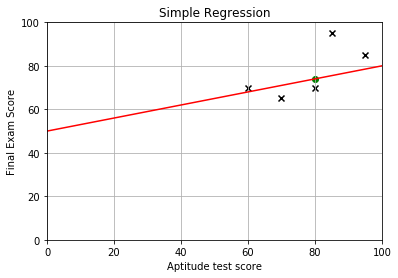

In [ ]:
#beta guess here.  Note that later you will find this using gradient decent
#beta = np.array([[26.768,0.644]]).T    #guess the best betas (2 x 1 array)  

#STUDENT CODE HERE.... GUESS YOUR BETA VALUES FOR Beta0 and Beta1
#suggestion:  make the beta guess bad
#--------------
beta0 = 50.0
beta1 = 0.3
#------------
#END STUDENT CODE


beta = np.array([[beta0,beta1]]).T      

#print the Betas and X's
print('Beta','\n', beta, '\n')
print('Design Matrix X', '\n', X, '\n')

#estimate yhat for all datapoints
yhat = np.dot(X,beta)

print('yhat','\n',  yhat,'\n')

#find the difference betwen predicted and truth 
ydiff = yhat-y
print('ydif (prediction errors)', '\n',ydiff, '\n')

#compute RSS
rss = np.dot(ydiff.T,ydiff)
#compute MSE
mse = rss/len(ydiff)
#compute RMSE
rmse =  np.sqrt(mse)
print()
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')

#make prediction on aptitude test score of 80
t = np.array([[1, 80]])
ythat = np.dot(t,beta)
print('Prediction at Aptitude 80', ythat, '\n')
plot_regression_results(X, y, t, ythat, beta0, beta1)

## Use gradient descent to find good values for the coefficients

Starting beta search


C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in subtract
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in subtract
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in minimum
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in minimum
C:\Users\Marvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less


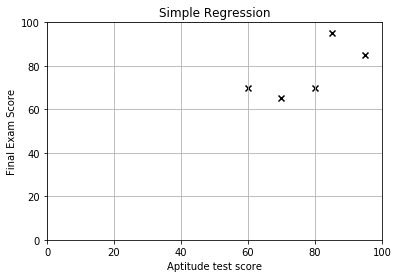

*** Iteration  10000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





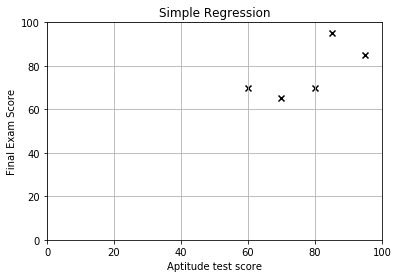

*** Iteration  20000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





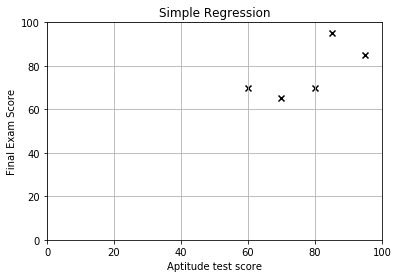

*** Iteration  30000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





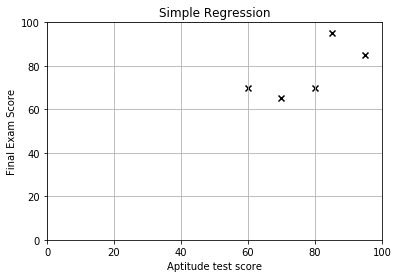

*** Iteration  40000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





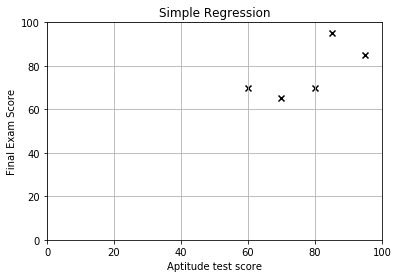

*** Iteration  50000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





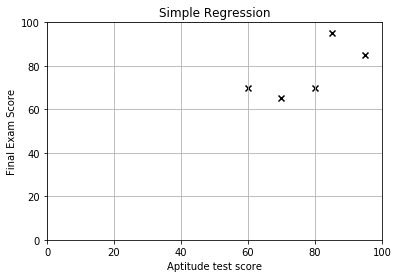

*** Iteration  60000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





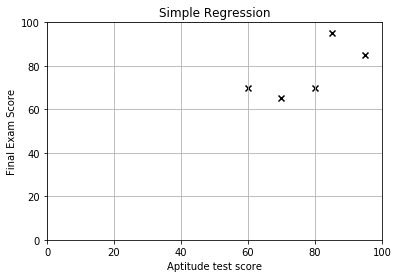

*** Iteration  70000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





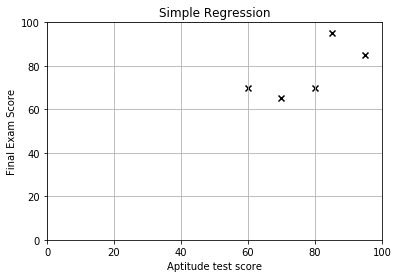

*** Iteration  80000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





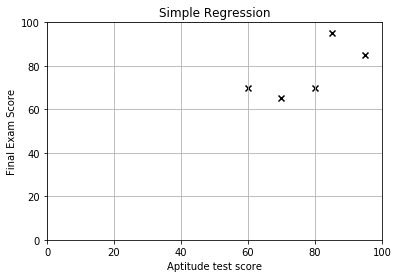

*** Iteration  90000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





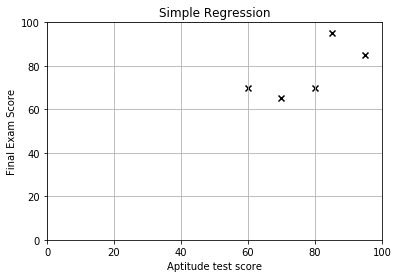

*** Iteration  100000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





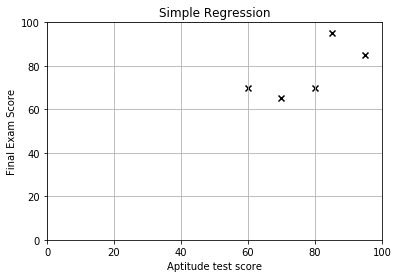

*** Iteration  110000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





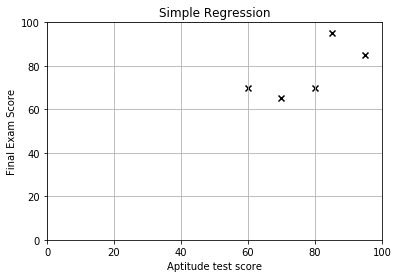

*** Iteration  120000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





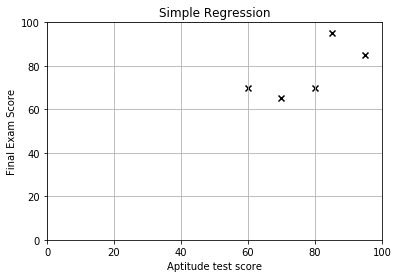

*** Iteration  130000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





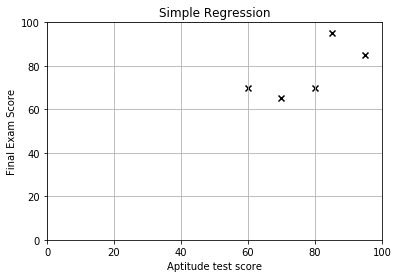

*** Iteration  140000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





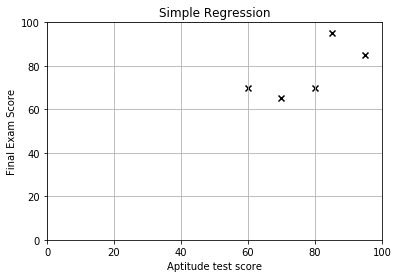

*** Iteration  150000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





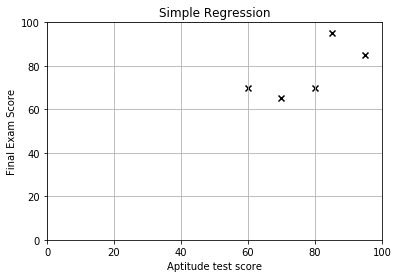

*** Iteration  160000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





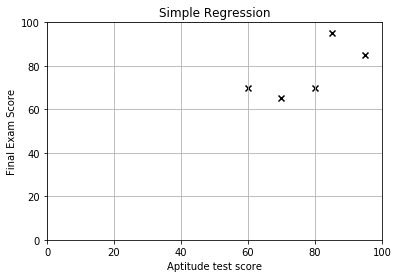

*** Iteration  170000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





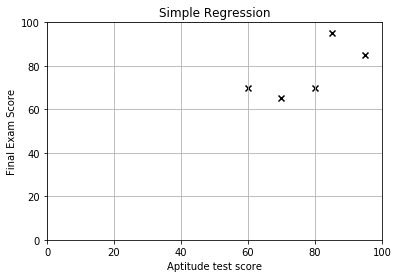

*** Iteration  180000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





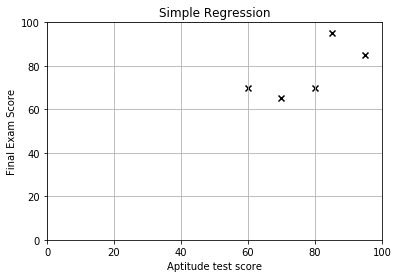

*** Iteration  190000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





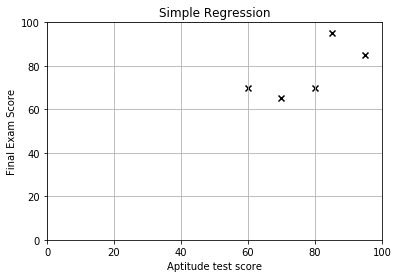

*** Iteration  200000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





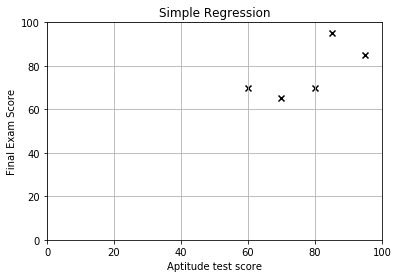

*** Iteration  210000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





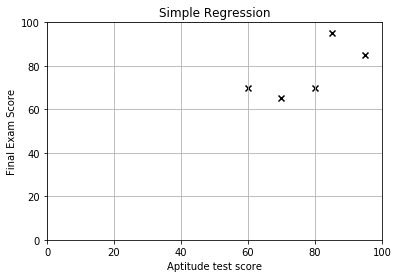

*** Iteration  220000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





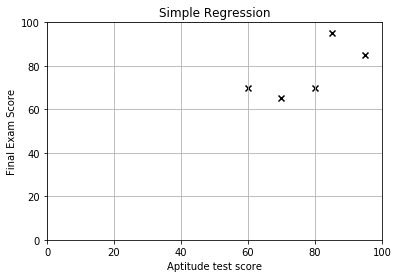

*** Iteration  230000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





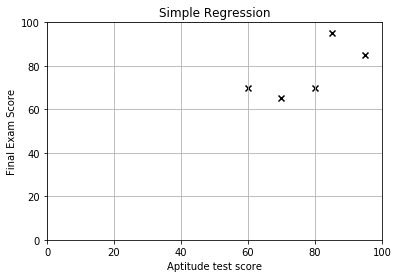

*** Iteration  240000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





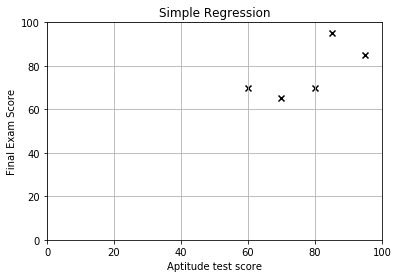

*** Iteration  250000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





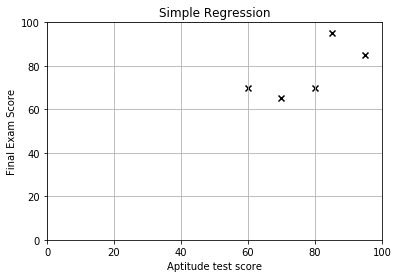

*** Iteration  260000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





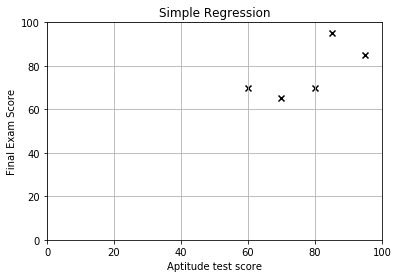

*** Iteration  270000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





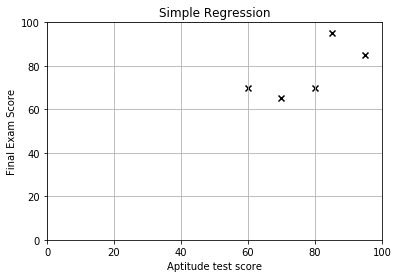

*** Iteration  280000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





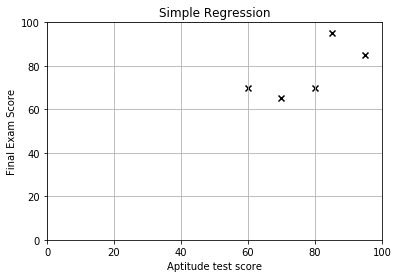

*** Iteration  290000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





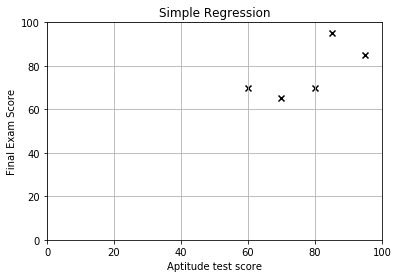

*** Iteration  300000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





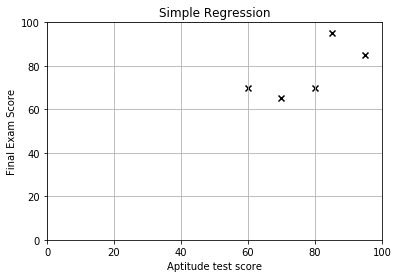

*** Iteration  310000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





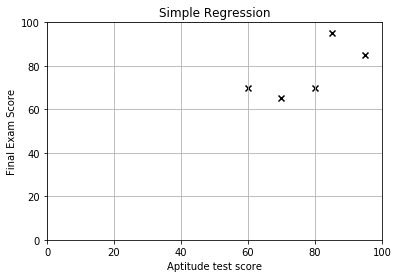

*** Iteration  320000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





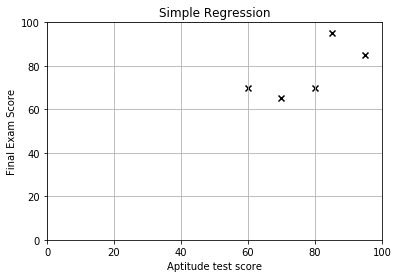

*** Iteration  330000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





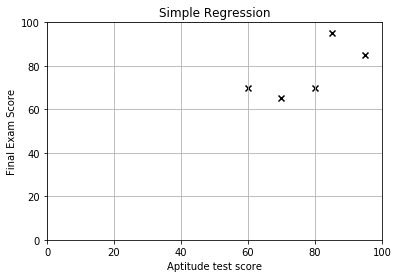

*** Iteration  340000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





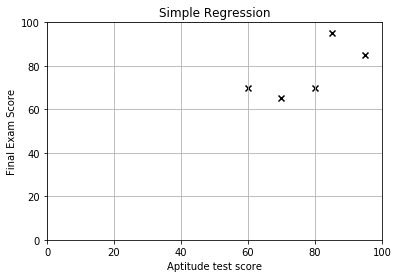

*** Iteration  350000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





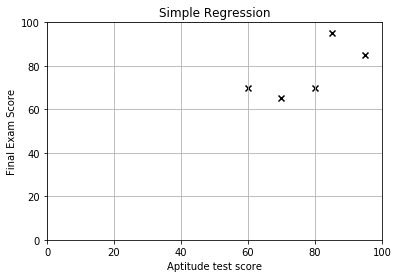

*** Iteration  360000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





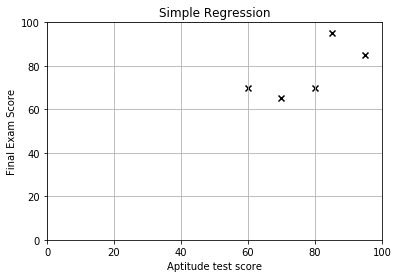

*** Iteration  370000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





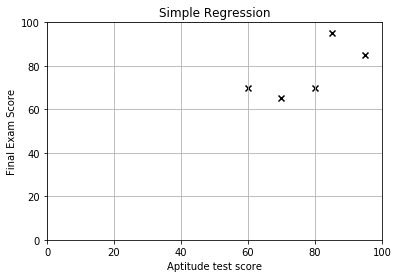

*** Iteration  380000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





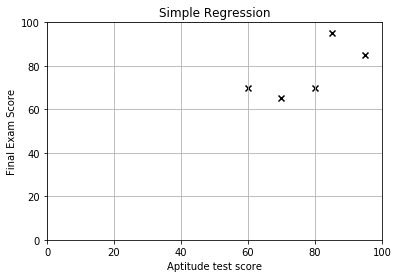

*** Iteration  390000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





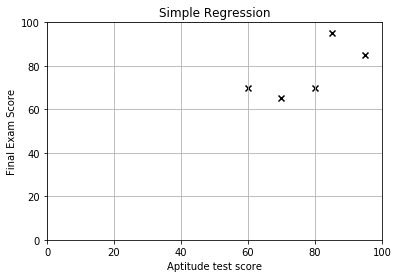

*** Iteration  400000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





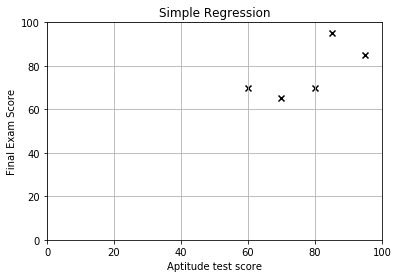

*** Iteration  410000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





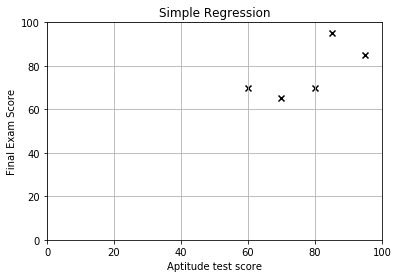

*** Iteration  420000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





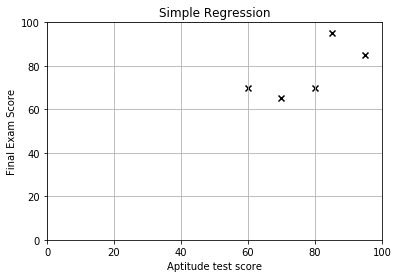

*** Iteration  430000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





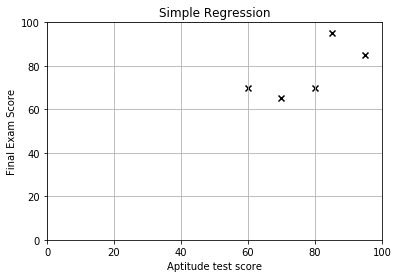

*** Iteration  440000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





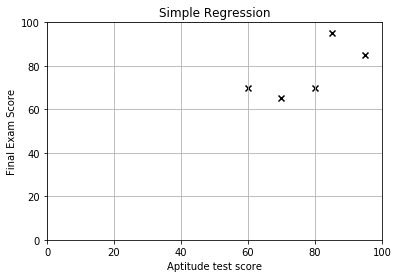

*** Iteration  450000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





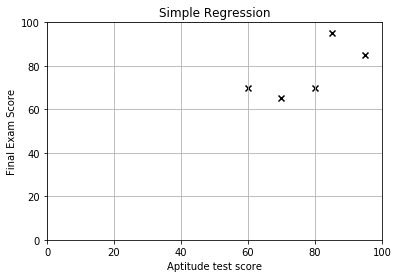

*** Iteration  460000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





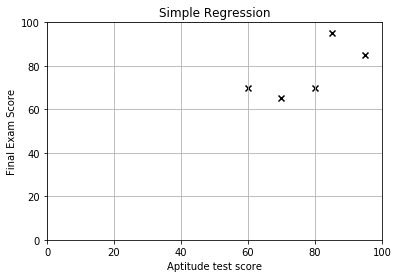

*** Iteration  470000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





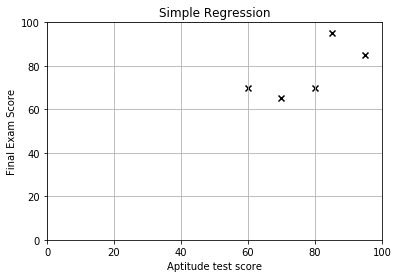

*** Iteration  480000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





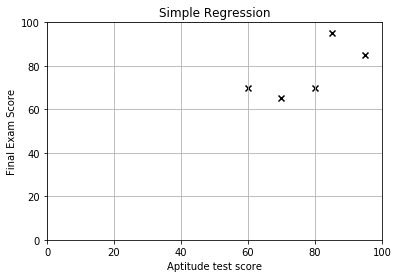

*** Iteration  490000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





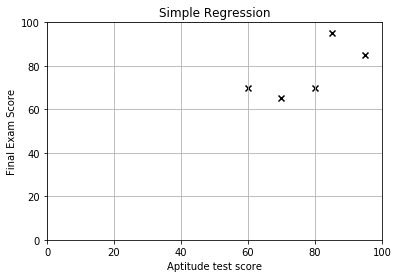

*** Iteration  500000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





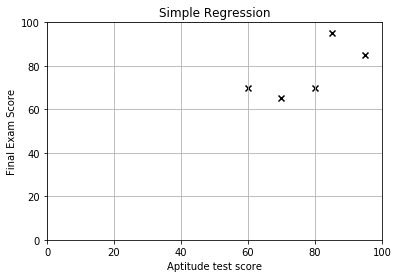

*** Iteration  510000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





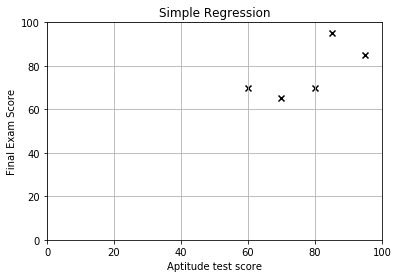

*** Iteration  520000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





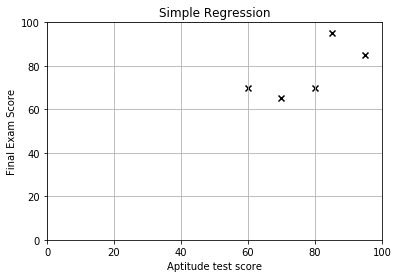

*** Iteration  530000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





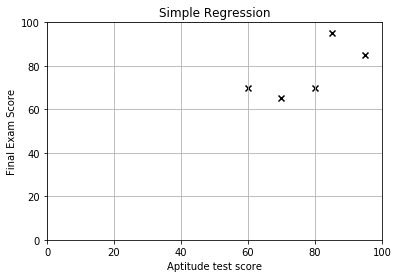

*** Iteration  540000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





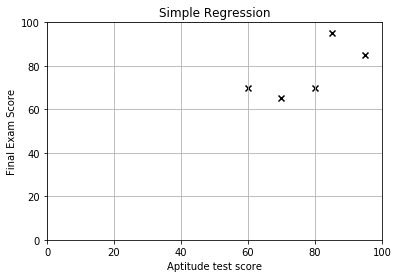

*** Iteration  550000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





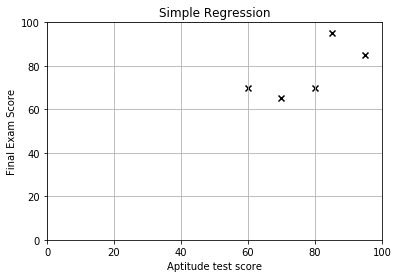

*** Iteration  560000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





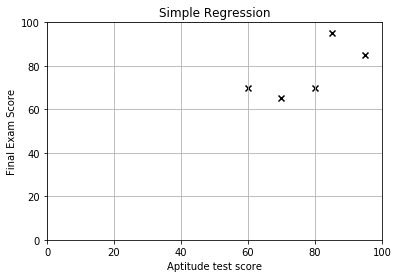

*** Iteration  570000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





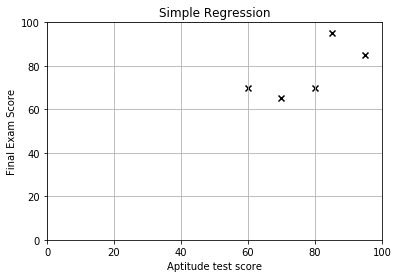

*** Iteration  580000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





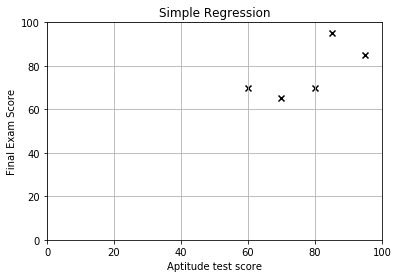

*** Iteration  590000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





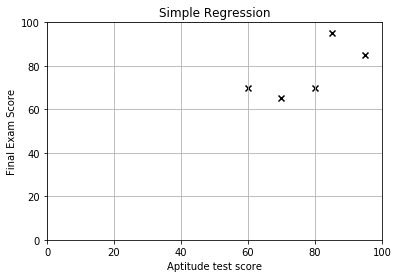

*** Iteration  600000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





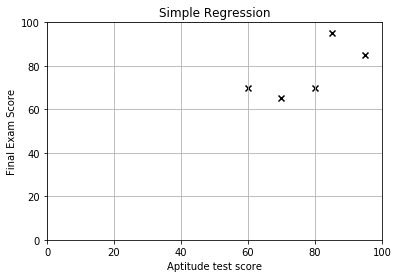

*** Iteration  610000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





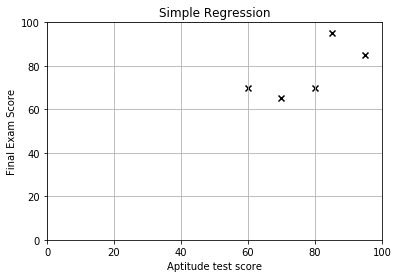

*** Iteration  620000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





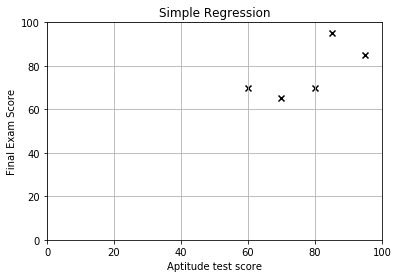

*** Iteration  630000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





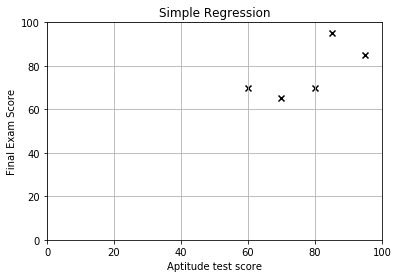

*** Iteration  640000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





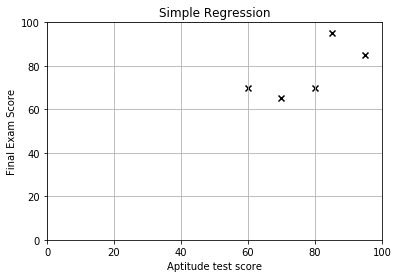

*** Iteration  650000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





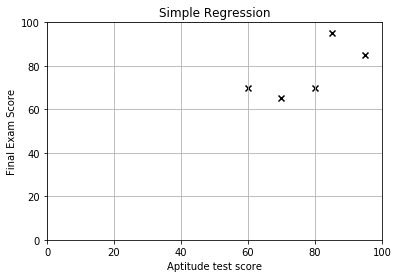

*** Iteration  660000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





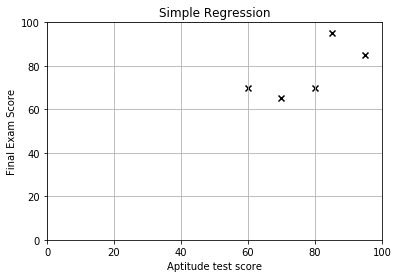

*** Iteration  670000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





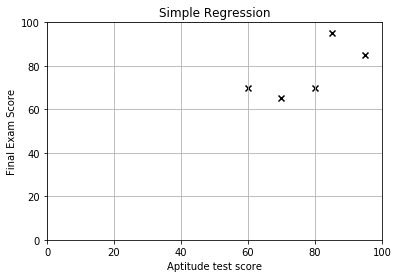

*** Iteration  680000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





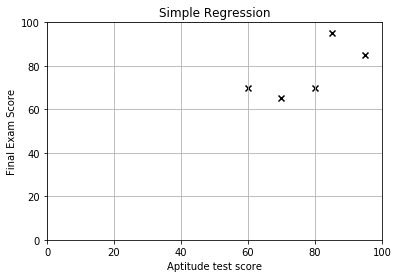

*** Iteration  690000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





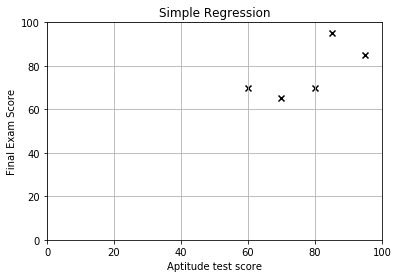

*** Iteration  700000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





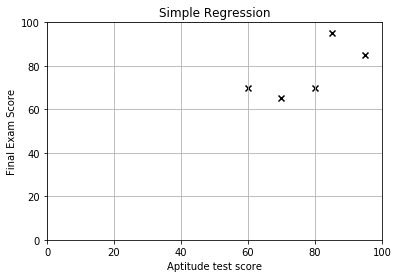

*** Iteration  710000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





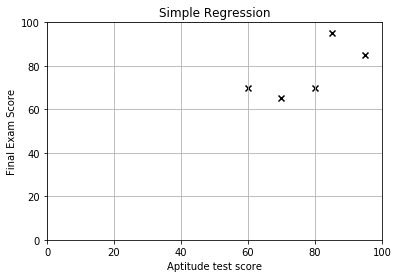

*** Iteration  720000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





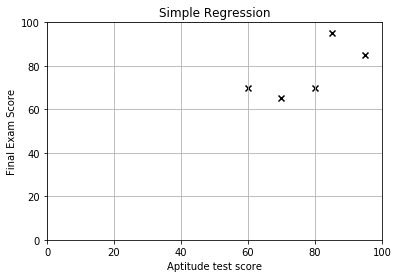

*** Iteration  730000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





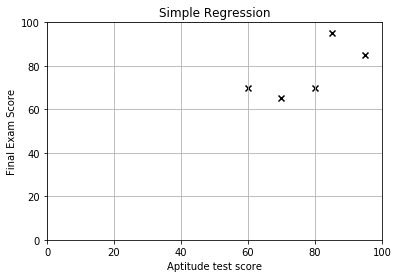

*** Iteration  740000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





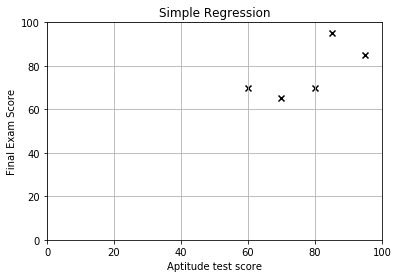

*** Iteration  750000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





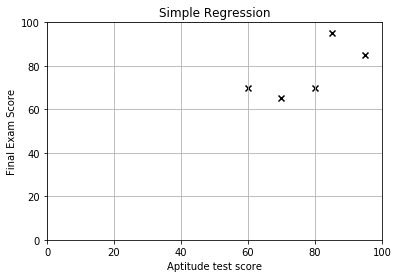

*** Iteration  760000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





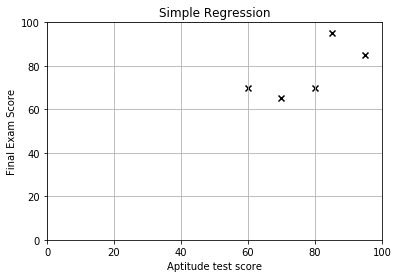

*** Iteration  770000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





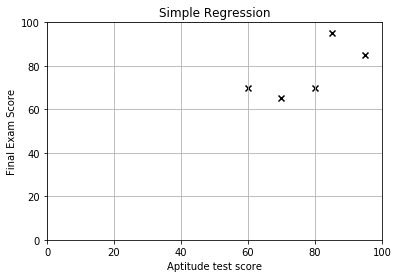

*** Iteration  780000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





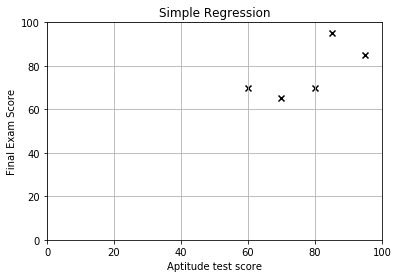

*** Iteration  790000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





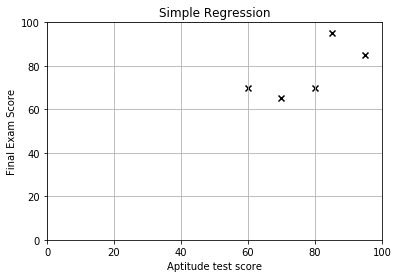

*** Iteration  800000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





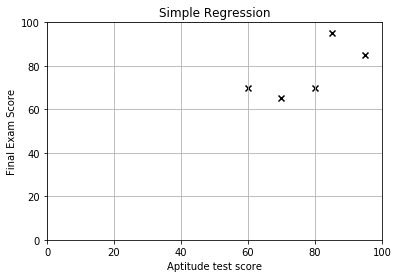

*** Iteration  810000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





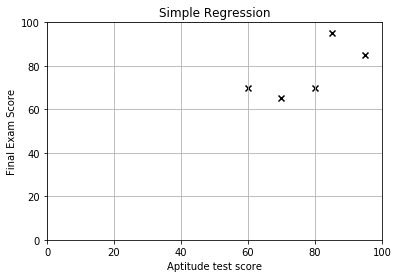

*** Iteration  820000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





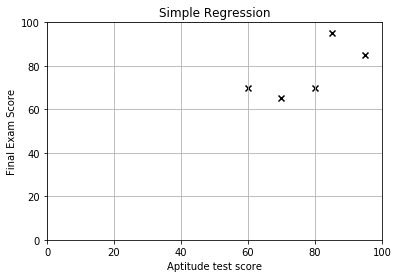

*** Iteration  830000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





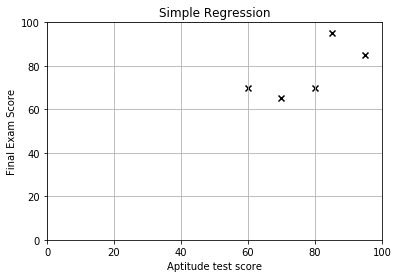

*** Iteration  840000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





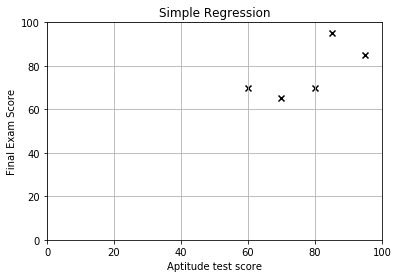

*** Iteration  850000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





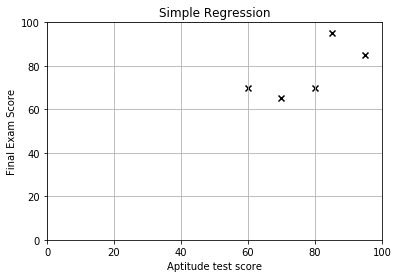

*** Iteration  860000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





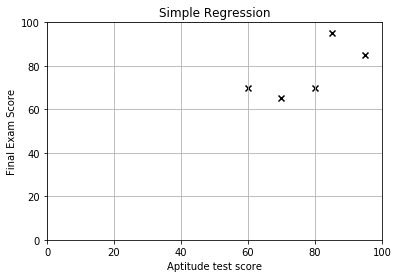

*** Iteration  870000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





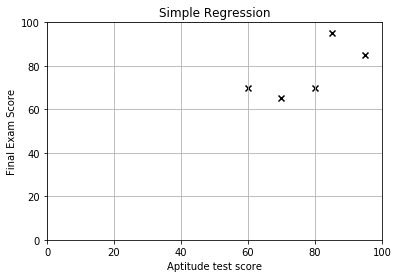

*** Iteration  880000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





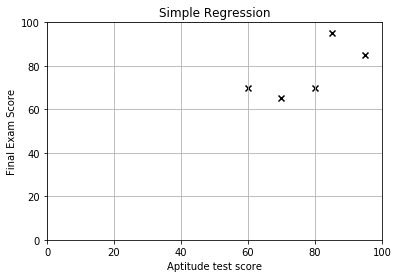

*** Iteration  890000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





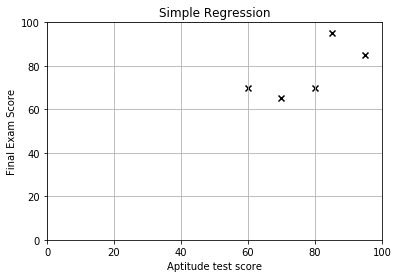

*** Iteration  900000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





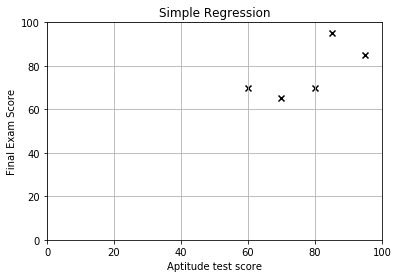

*** Iteration  910000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





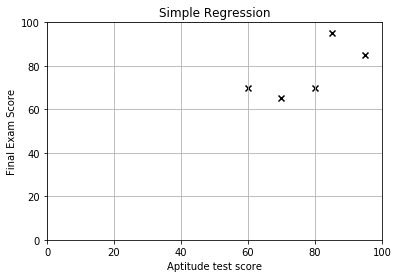

*** Iteration  920000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





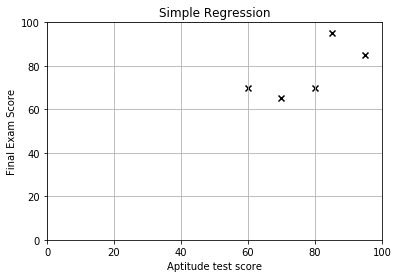

*** Iteration  930000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





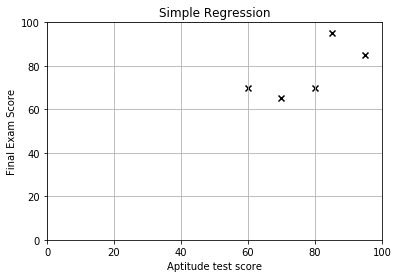

*** Iteration  940000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





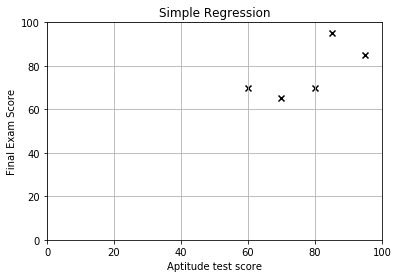

*** Iteration  950000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





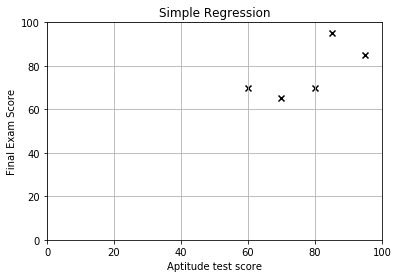

*** Iteration  960000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





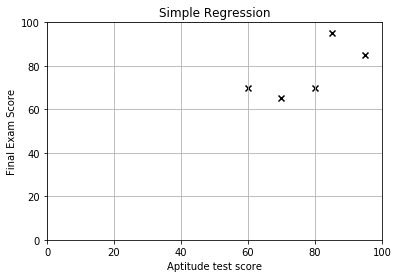

*** Iteration  970000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





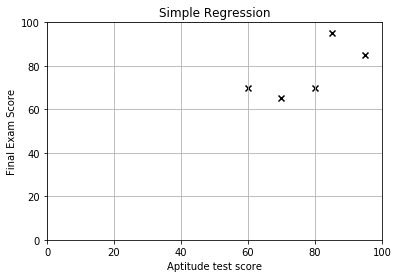

*** Iteration  980000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





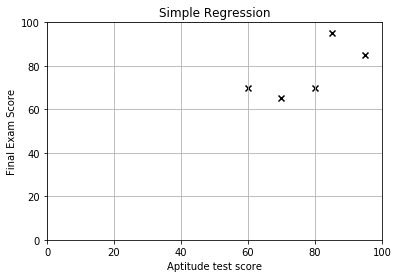

*** Iteration  990000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





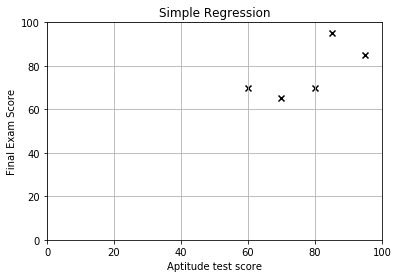

*** Iteration  1000000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





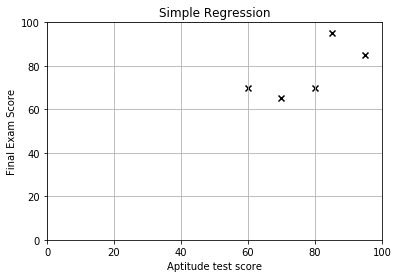

*** Iteration  1010000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





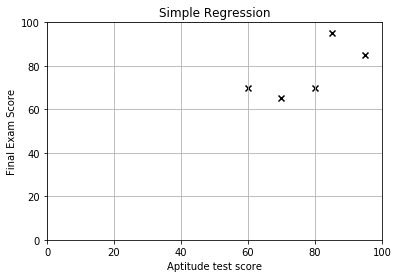

*** Iteration  1020000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





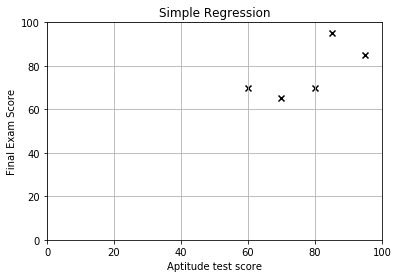

*** Iteration  1030000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





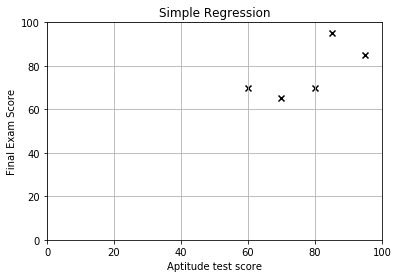

*** Iteration  1040000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





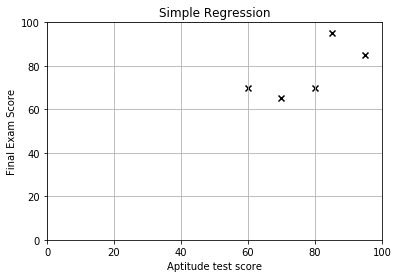

*** Iteration  1050000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





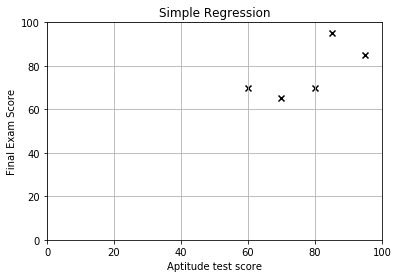

*** Iteration  1060000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





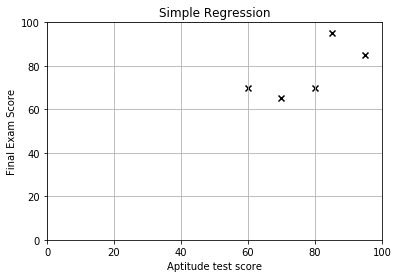

*** Iteration  1070000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





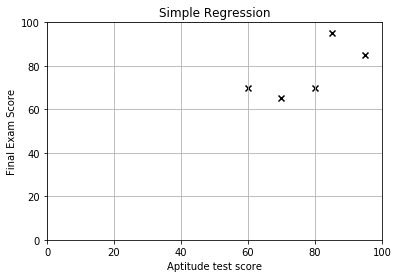

*** Iteration  1080000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





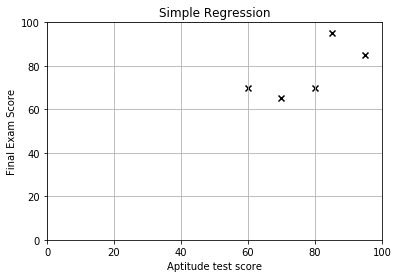

*** Iteration  1090000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





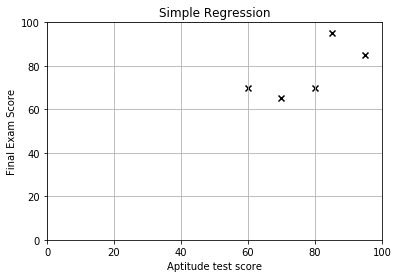

*** Iteration  1100000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





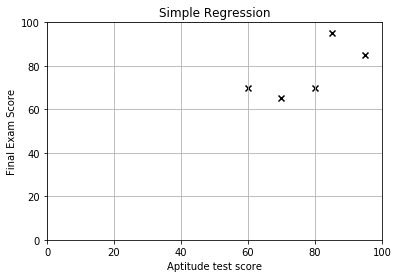

*** Iteration  1110000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





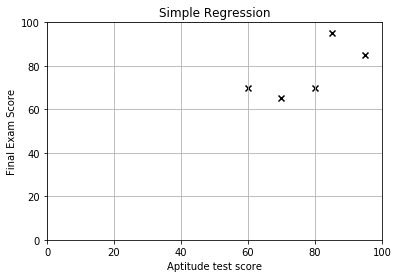

*** Iteration  1120000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





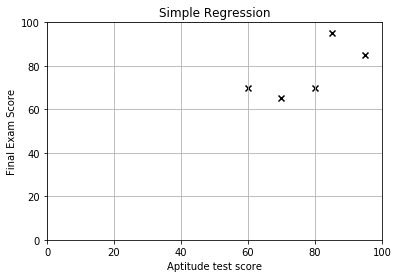

*** Iteration  1130000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





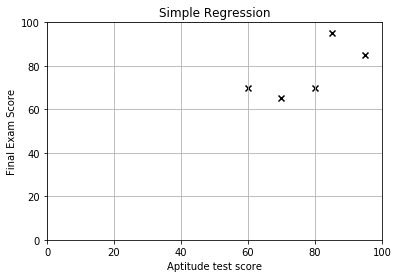

*** Iteration  1140000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





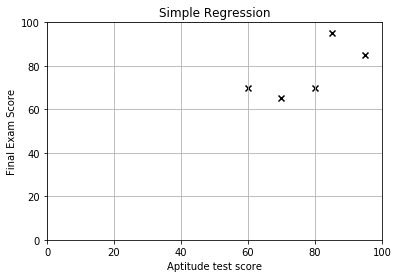

*** Iteration  1150000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





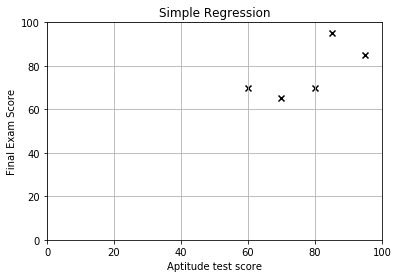

*** Iteration  1160000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





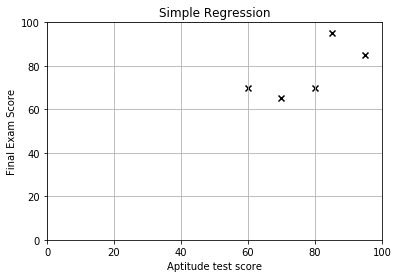

*** Iteration  1170000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





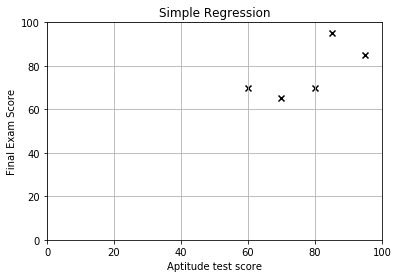

*** Iteration  1180000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





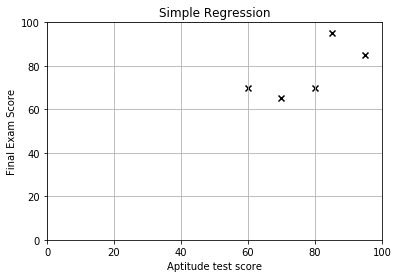

*** Iteration  1190000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





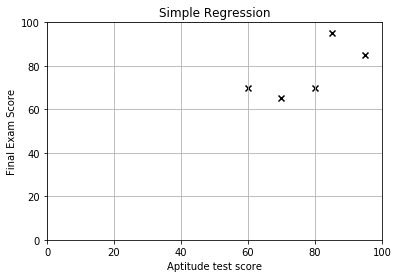

*** Iteration  1200000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





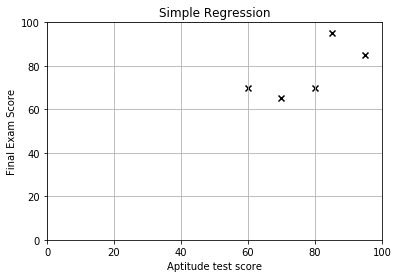

*** Iteration  1210000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





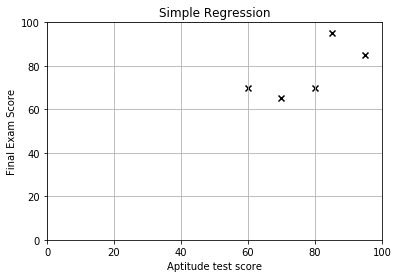

*** Iteration  1220000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





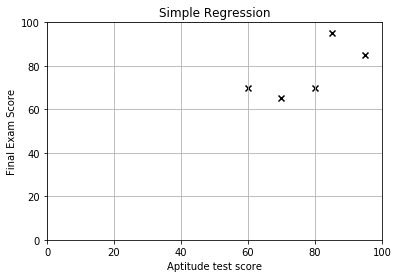

*** Iteration  1230000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





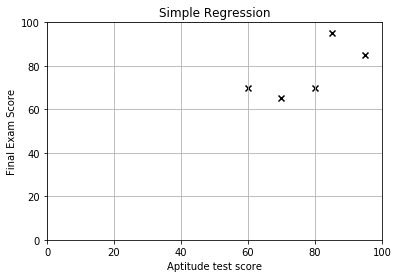

*** Iteration  1240000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





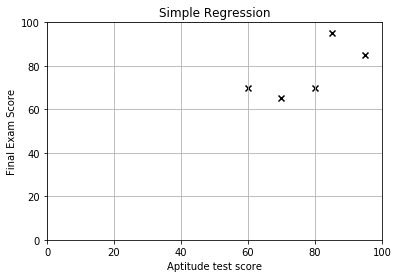

*** Iteration  1250000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





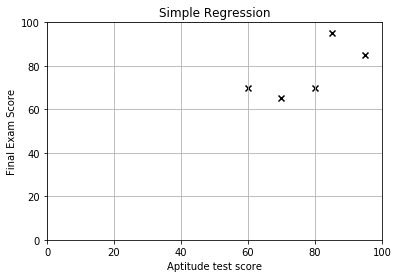

*** Iteration  1260000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





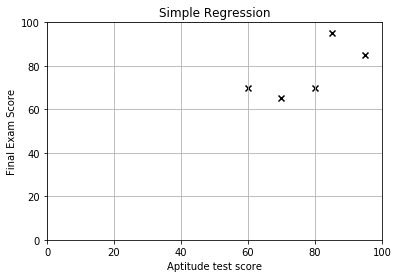

*** Iteration  1270000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





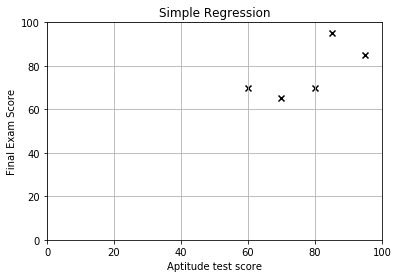

*** Iteration  1280000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





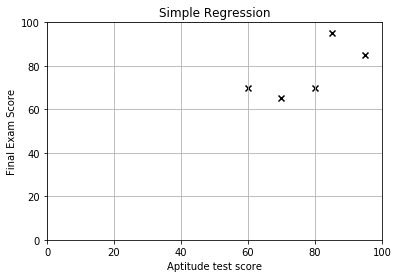

*** Iteration  1290000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





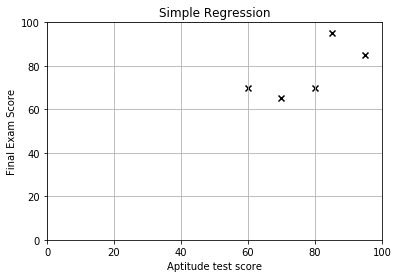

*** Iteration  1300000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





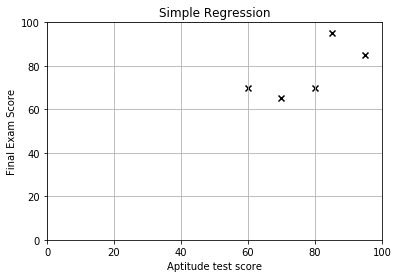

*** Iteration  1310000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





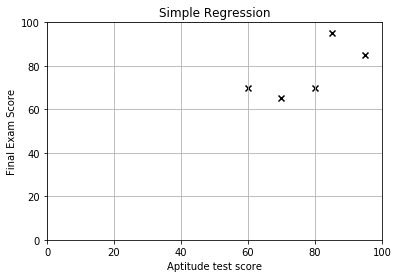

*** Iteration  1320000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





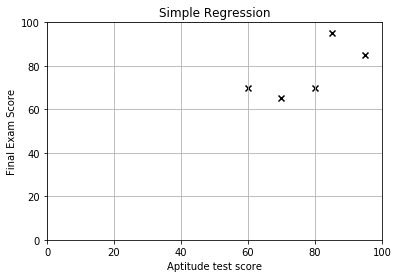

*** Iteration  1330000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





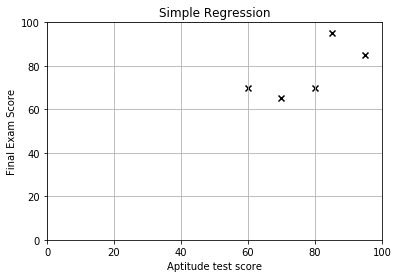

*** Iteration  1340000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





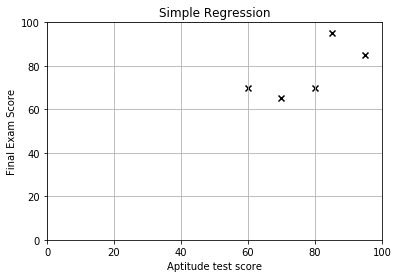

*** Iteration  1350000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





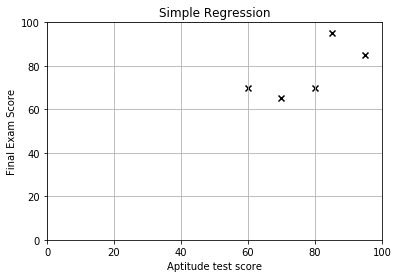

*** Iteration  1360000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





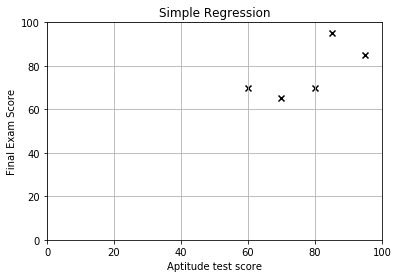

*** Iteration  1370000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





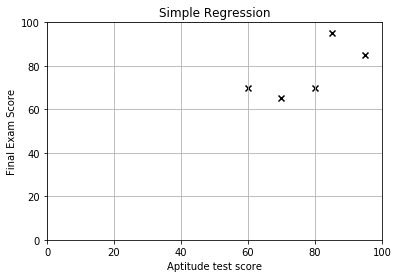

*** Iteration  1380000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





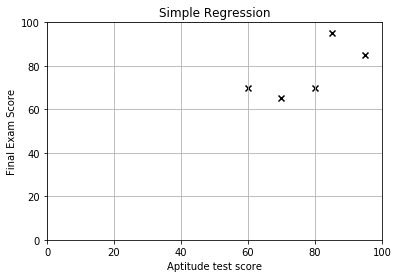

*** Iteration  1390000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





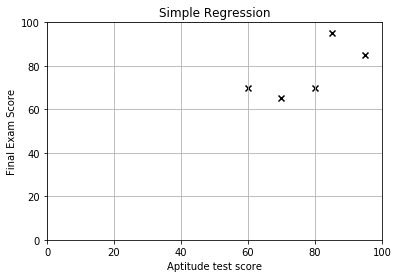

*** Iteration  1400000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





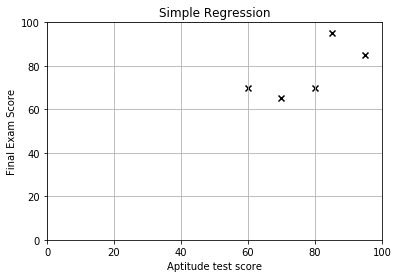

*** Iteration  1410000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





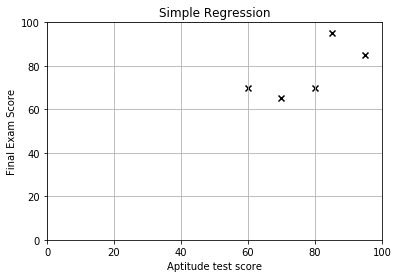

*** Iteration  1420000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





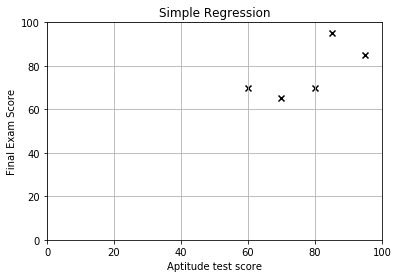

*** Iteration  1430000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





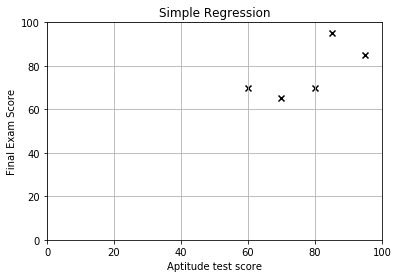

*** Iteration  1440000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





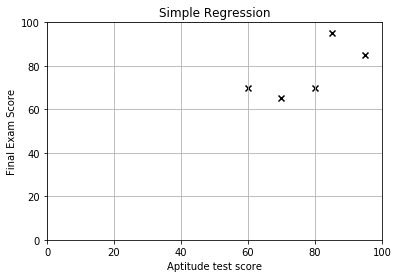

*** Iteration  1450000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





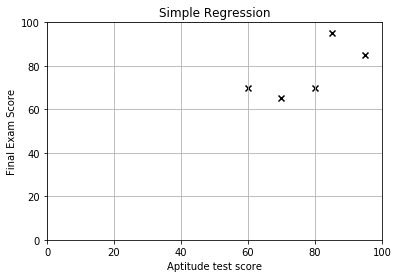

*** Iteration  1460000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





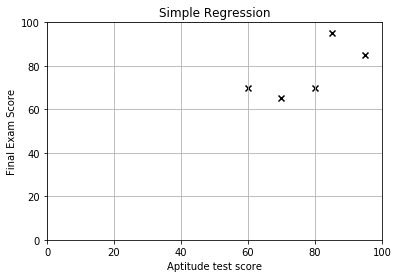

*** Iteration  1470000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





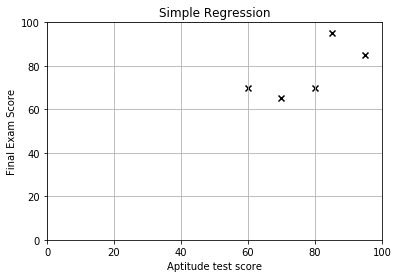

*** Iteration  1480000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





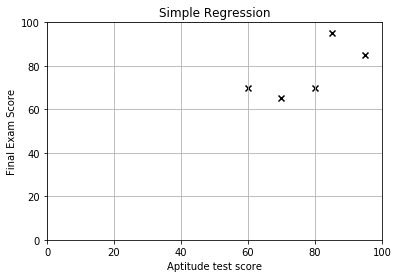

*** Iteration  1490000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





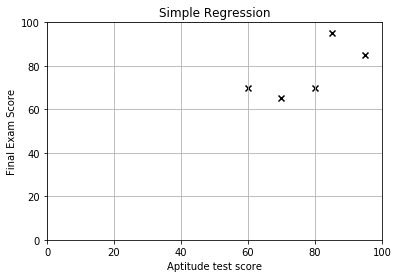

*** Iteration  1500000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





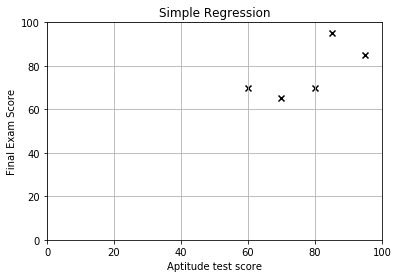

*** Iteration  1510000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





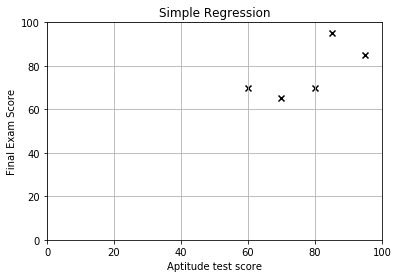

*** Iteration  1520000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





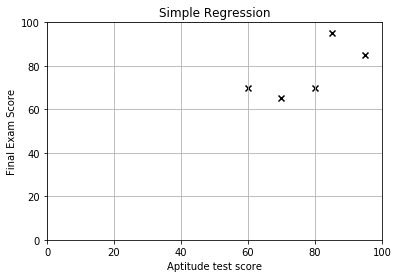

*** Iteration  1530000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





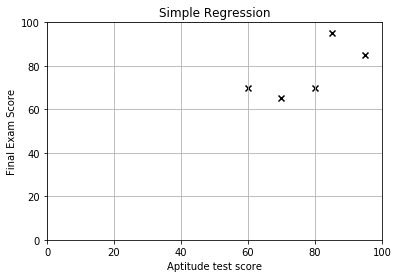

*** Iteration  1540000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





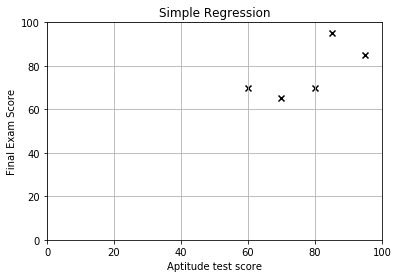

*** Iteration  1550000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





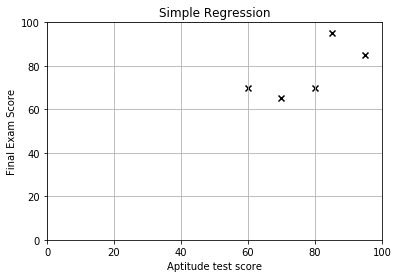

*** Iteration  1560000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





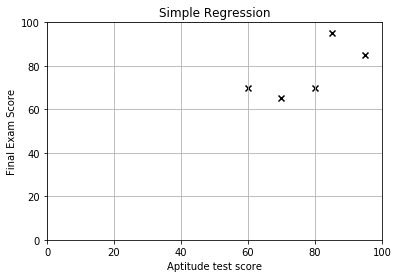

*** Iteration  1570000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





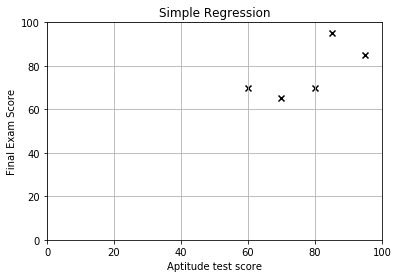

*** Iteration  1580000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





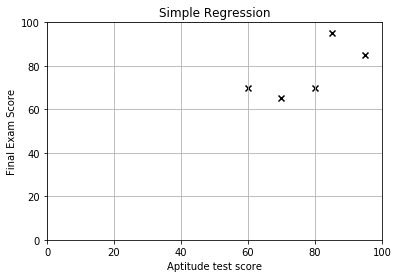

*** Iteration  1590000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





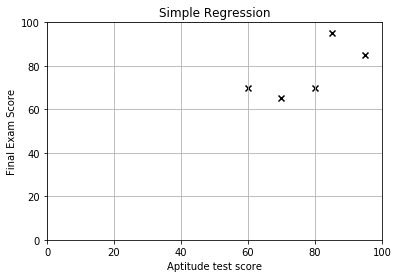

*** Iteration  1600000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





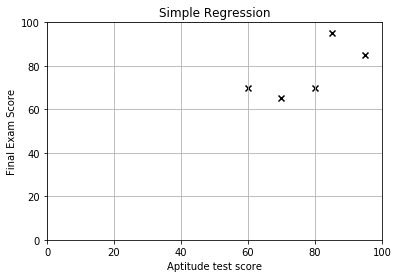

*** Iteration  1610000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





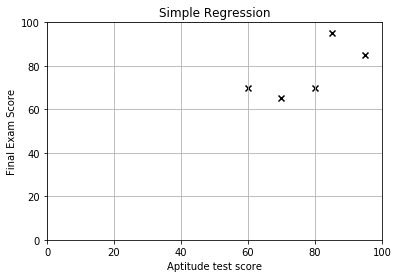

*** Iteration  1620000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





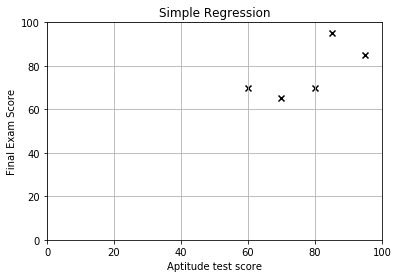

*** Iteration  1630000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





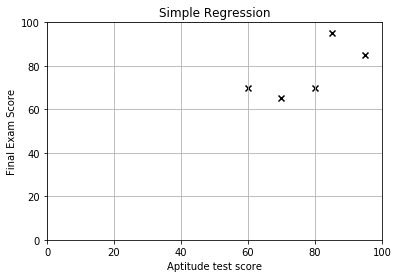

*** Iteration  1640000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





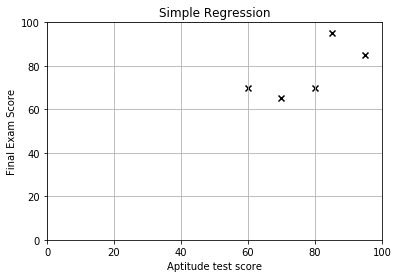

*** Iteration  1650000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





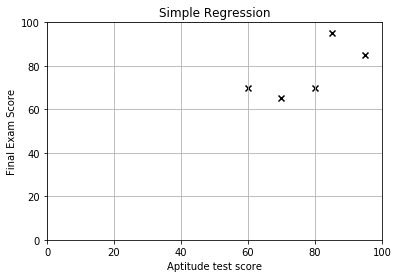

*** Iteration  1660000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





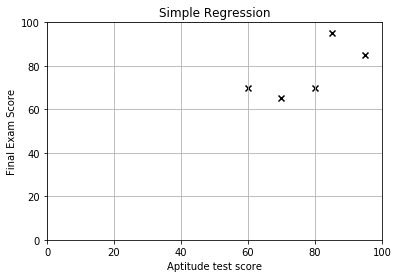

*** Iteration  1670000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





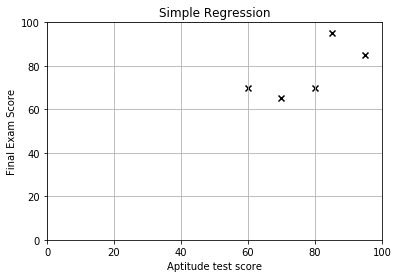

*** Iteration  1680000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





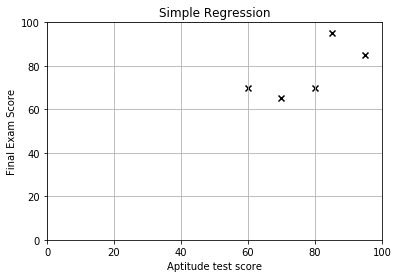

*** Iteration  1690000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





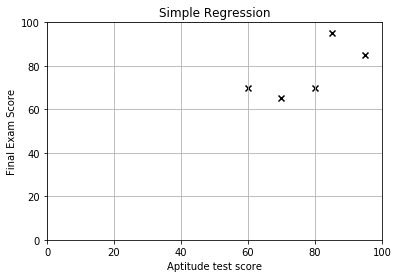

*** Iteration  1700000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





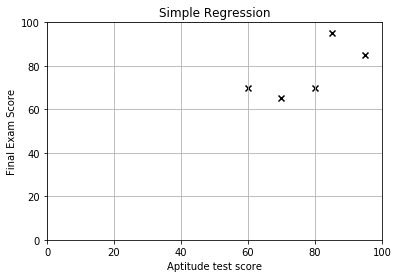

*** Iteration  1710000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





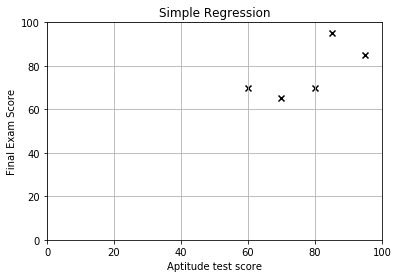

*** Iteration  1720000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





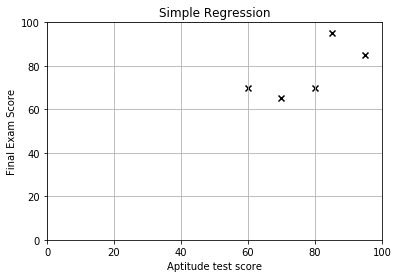

*** Iteration  1730000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





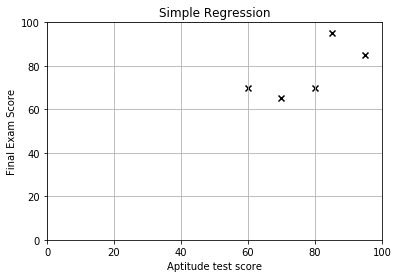

*** Iteration  1740000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





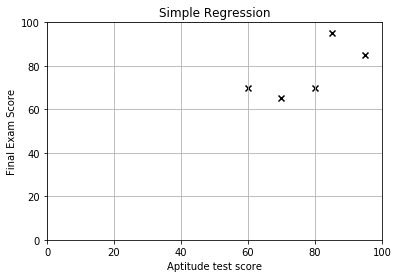

*** Iteration  1750000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





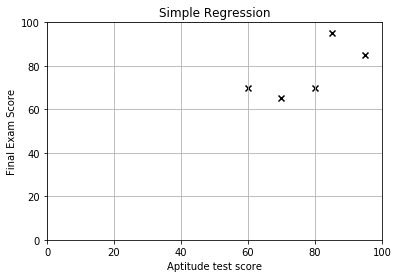

*** Iteration  1760000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





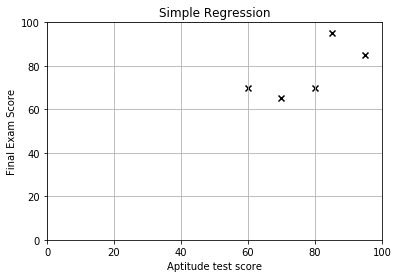

*** Iteration  1770000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





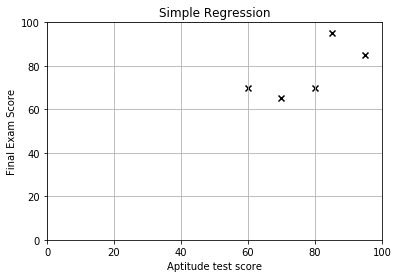

*** Iteration  1780000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





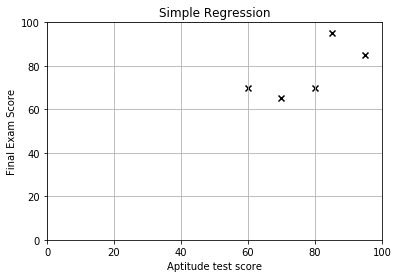

*** Iteration  1790000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





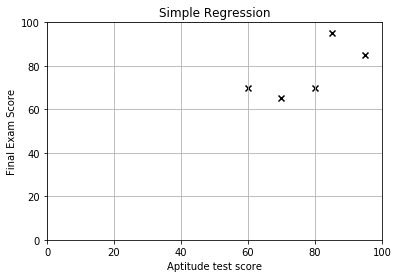

*** Iteration  1800000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





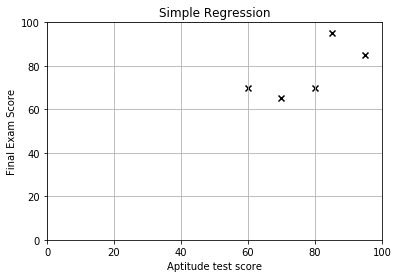

*** Iteration  1810000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





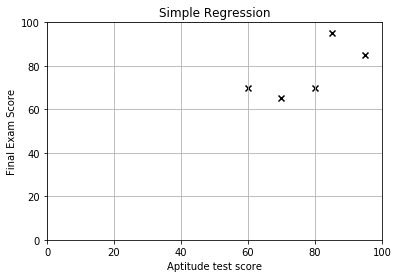

*** Iteration  1820000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





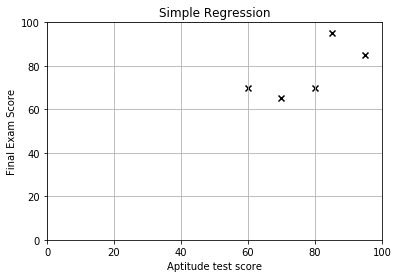

*** Iteration  1830000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





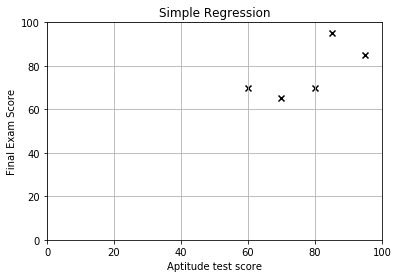

*** Iteration  1840000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





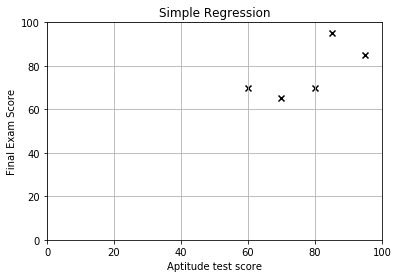

*** Iteration  1850000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





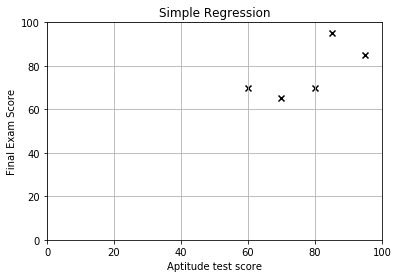

*** Iteration  1860000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





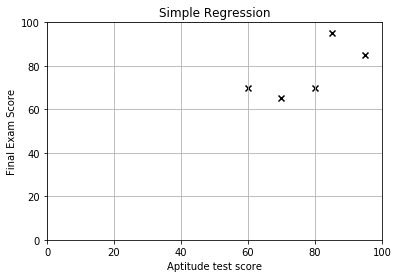

*** Iteration  1870000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





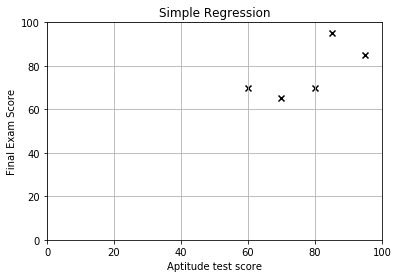

*** Iteration  1880000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





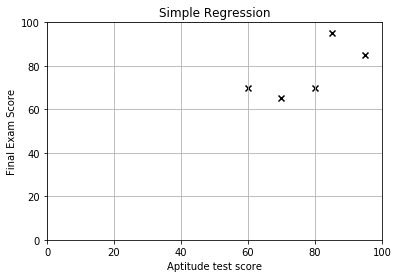

*** Iteration  1890000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





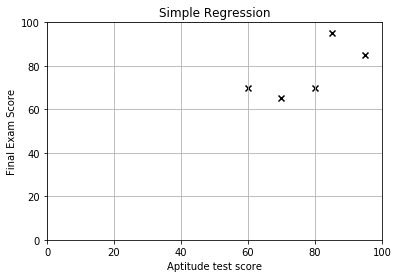

*** Iteration  1900000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





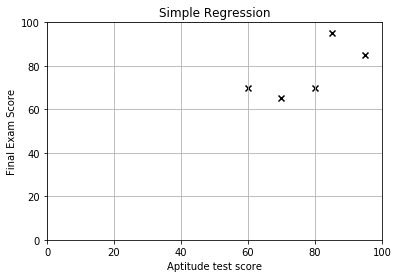

*** Iteration  1910000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





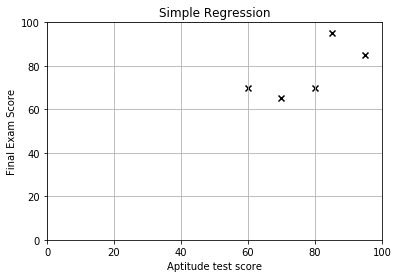

*** Iteration  1920000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





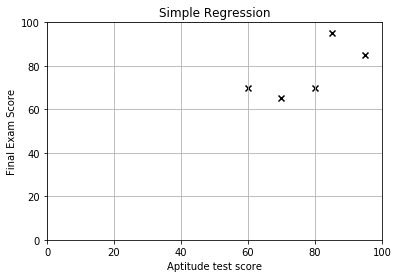

*** Iteration  1930000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





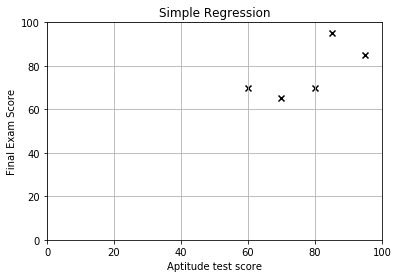

*** Iteration  1940000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





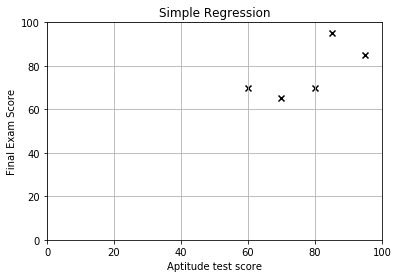

*** Iteration  1950000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





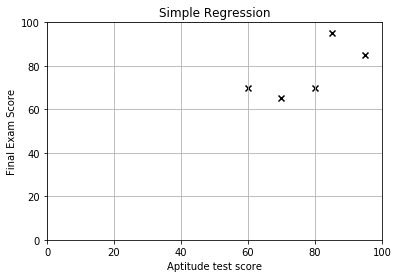

*** Iteration  1960000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





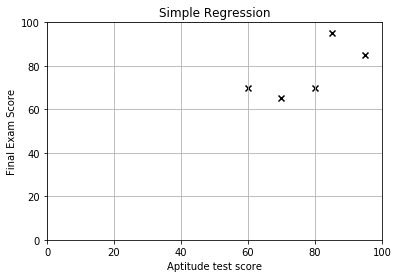

*** Iteration  1970000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





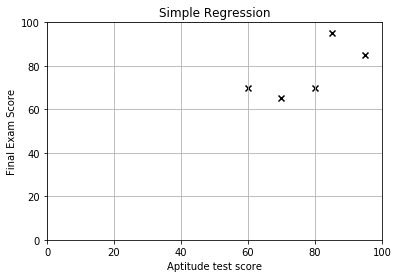

*** Iteration  1980000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





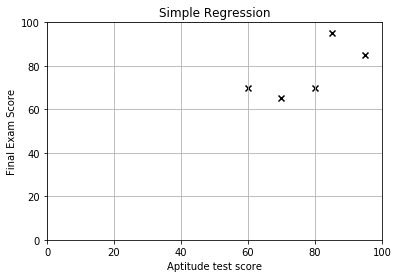

*** Iteration  1990000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





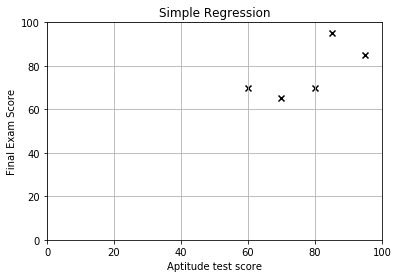

*** Iteration  2000000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





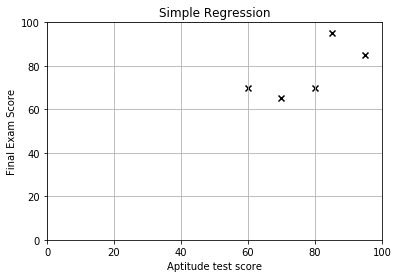

*** Iteration  2010000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





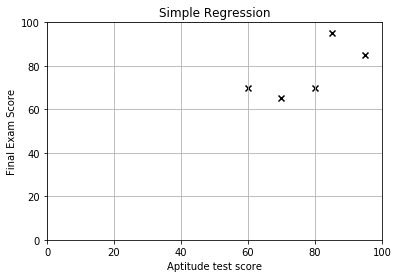

*** Iteration  2020000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





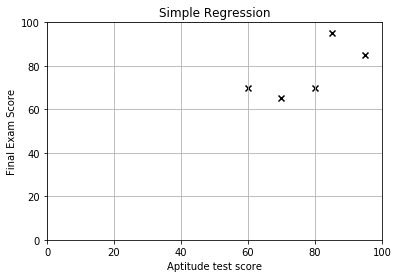

*** Iteration  2030000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





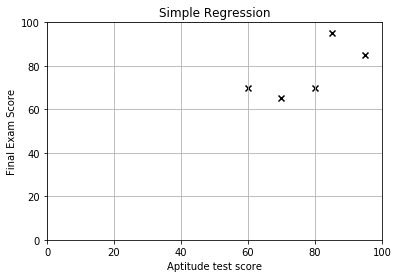

*** Iteration  2040000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





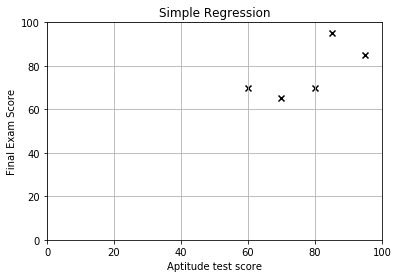

*** Iteration  2050000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





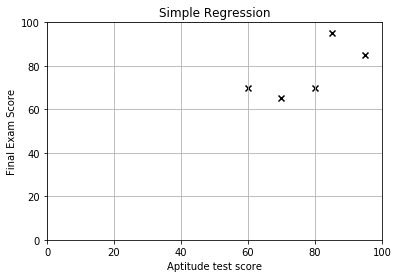

*** Iteration  2060000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





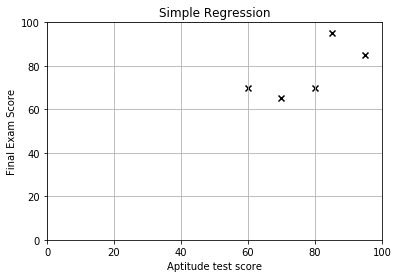

*** Iteration  2070000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





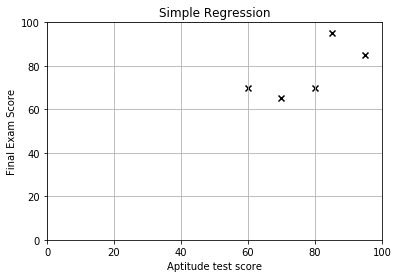

*** Iteration  2080000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





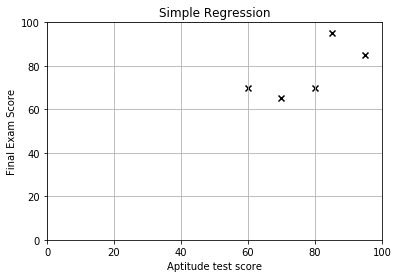

*** Iteration  2090000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





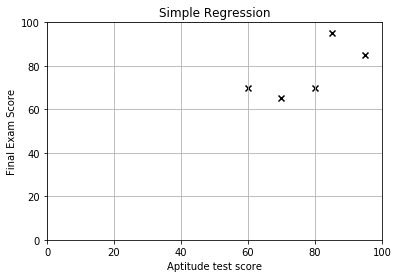

*** Iteration  2100000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





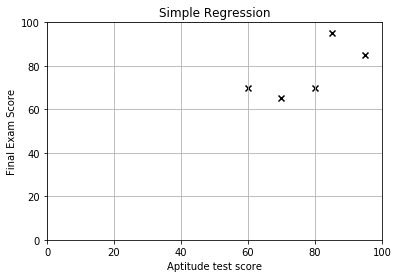

*** Iteration  2110000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





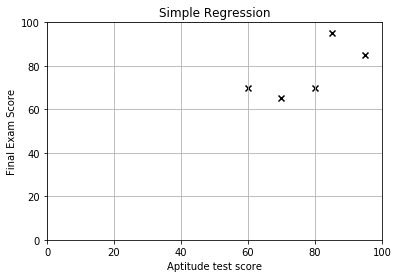

*** Iteration  2120000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





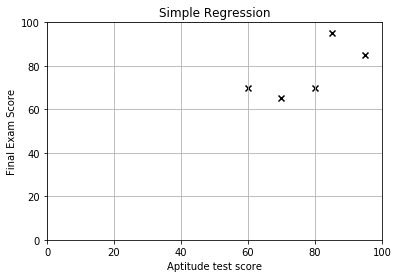

*** Iteration  2130000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





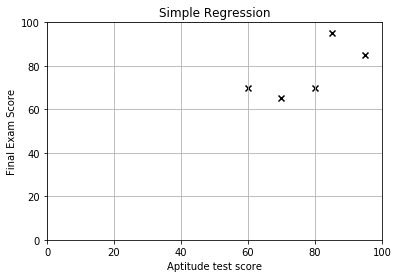

*** Iteration  2140000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





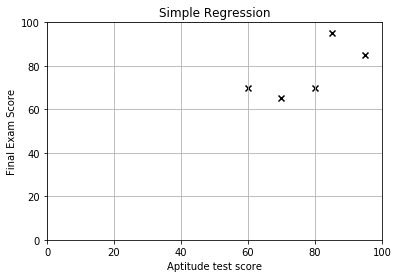

*** Iteration  2150000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





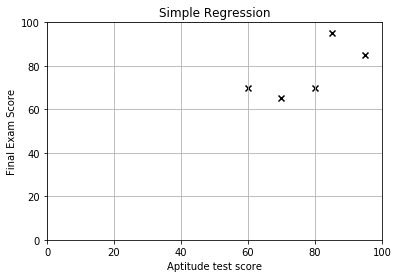

*** Iteration  2160000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





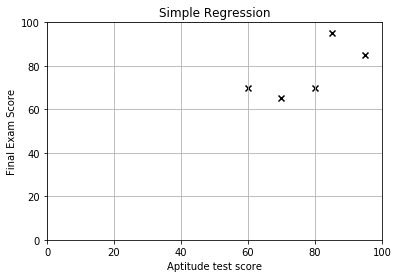

*** Iteration  2170000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





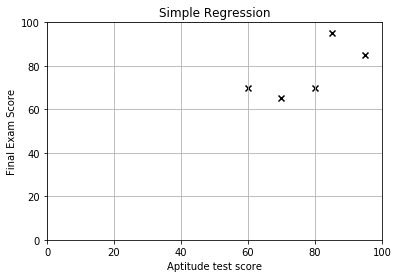

*** Iteration  2180000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





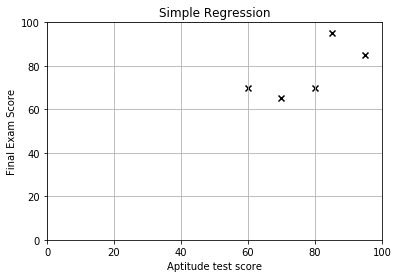

*** Iteration  2190000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





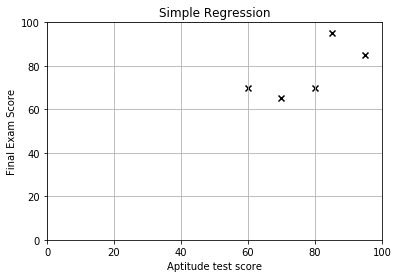

*** Iteration  2200000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





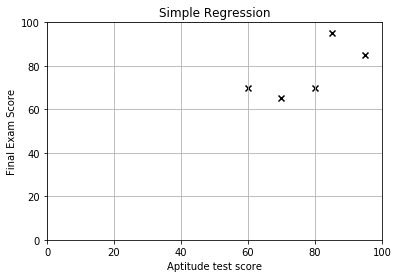

*** Iteration  2210000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





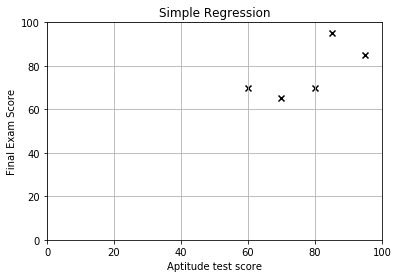

*** Iteration  2220000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





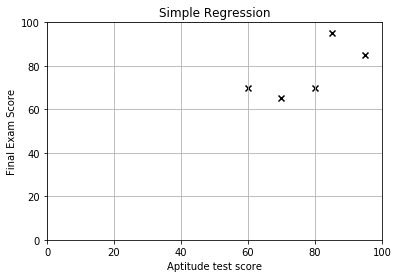

*** Iteration  2230000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





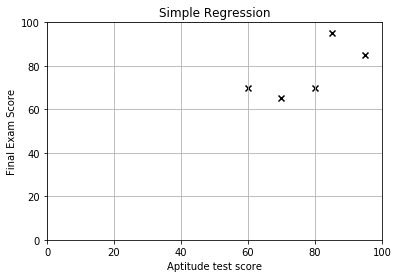

*** Iteration  2240000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





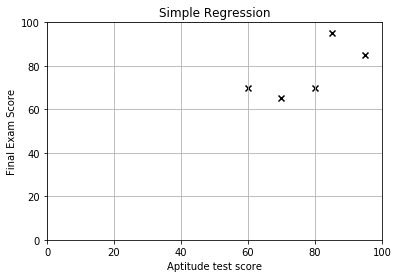

*** Iteration  2250000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





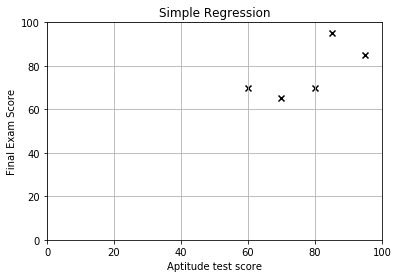

*** Iteration  2260000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





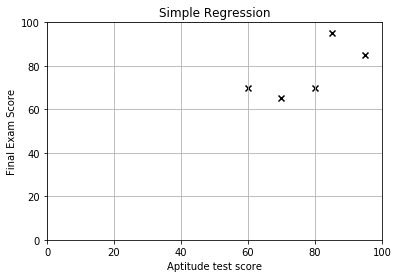

*** Iteration  2270000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





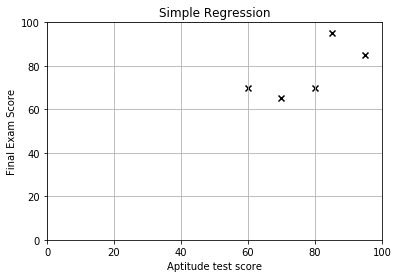

*** Iteration  2280000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





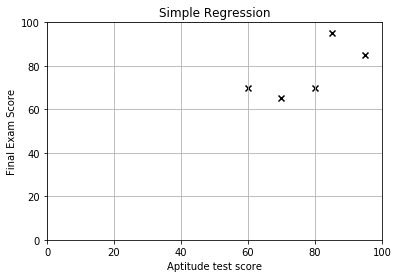

*** Iteration  2290000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





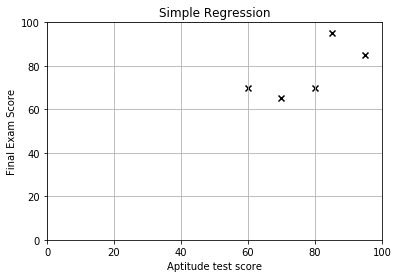

*** Iteration  2300000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





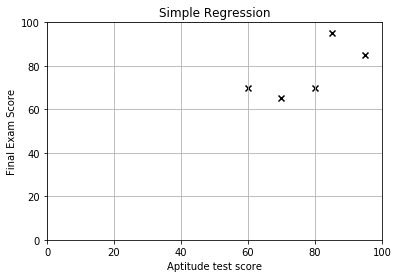

*** Iteration  2310000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





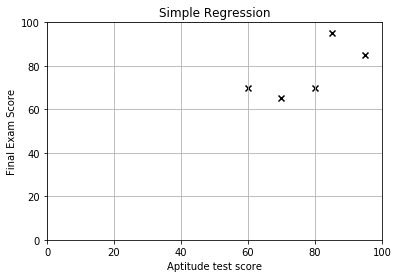

*** Iteration  2320000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





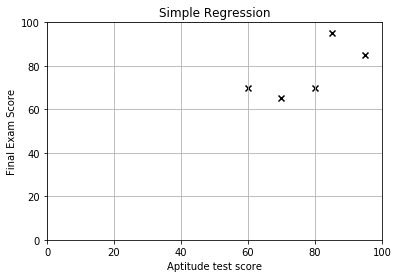

*** Iteration  2330000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





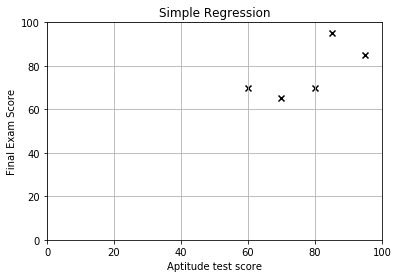

*** Iteration  2340000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





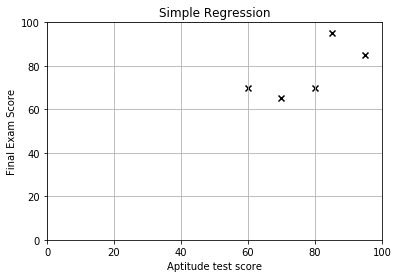

*** Iteration  2350000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





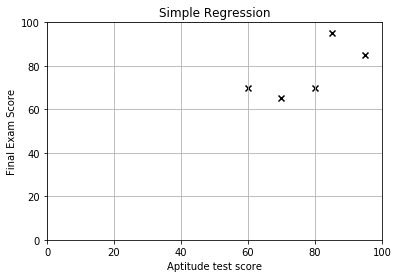

*** Iteration  2360000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





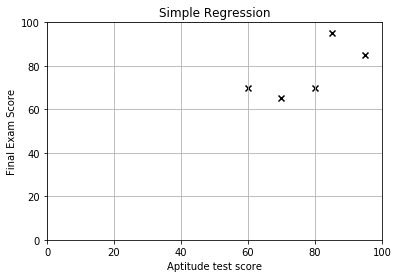

*** Iteration  2370000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





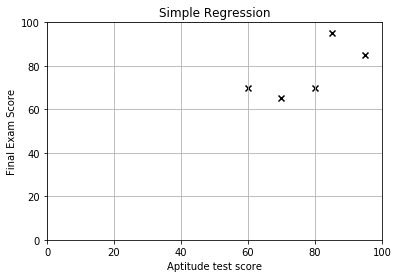

*** Iteration  2380000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





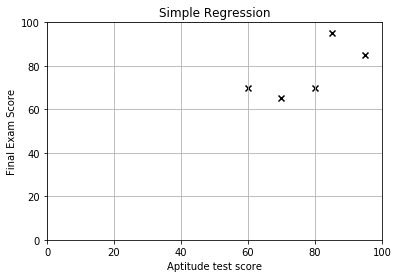

*** Iteration  2390000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





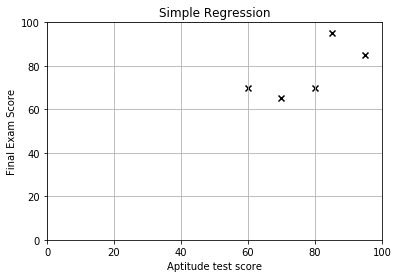

*** Iteration  2400000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





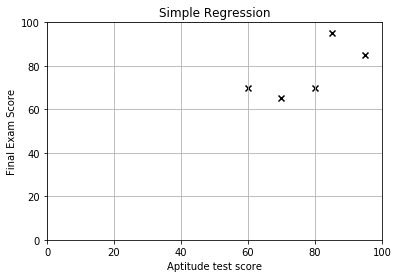

*** Iteration  2410000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





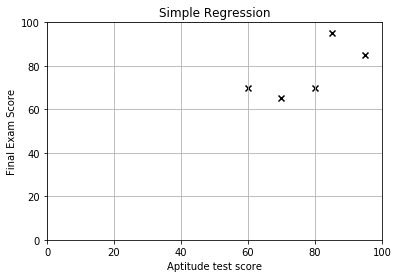

*** Iteration  2420000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





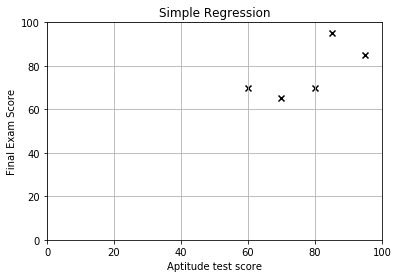

*** Iteration  2430000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





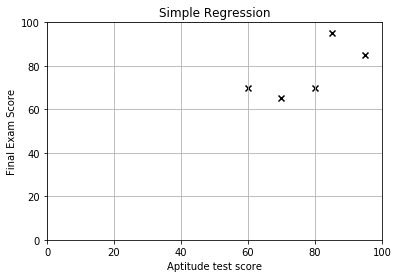

*** Iteration  2440000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





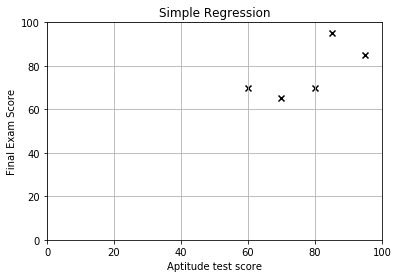

*** Iteration  2450000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





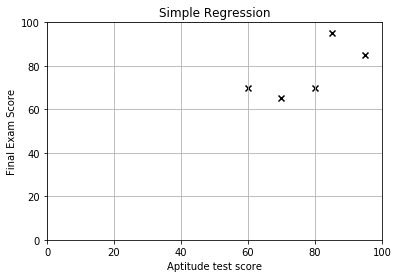

*** Iteration  2460000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





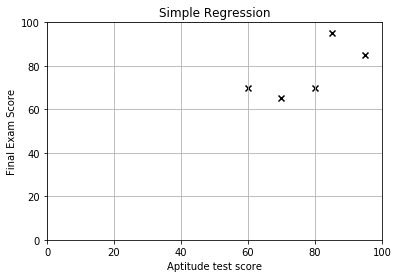

*** Iteration  2470000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





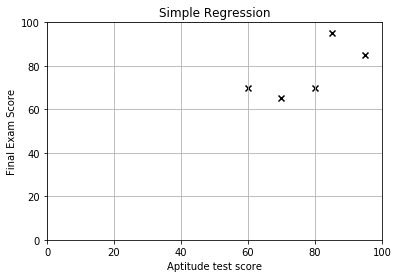

*** Iteration  2480000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





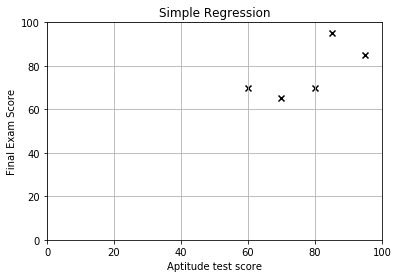

*** Iteration  2490000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





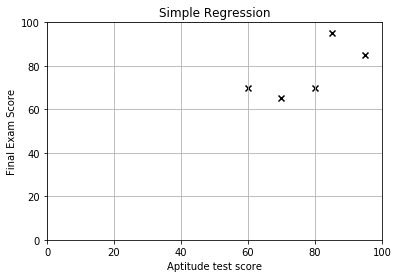

*** Iteration  2500000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





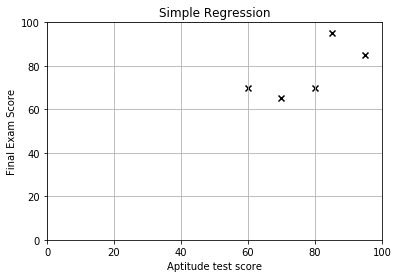

*** Iteration  2510000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





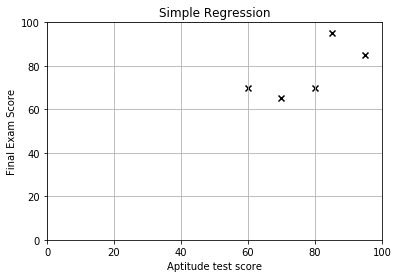

*** Iteration  2520000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





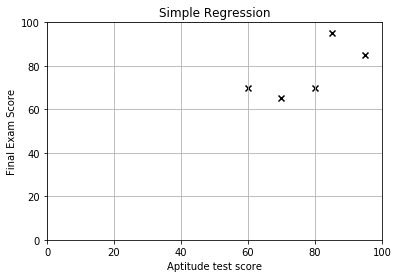

*** Iteration  2530000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





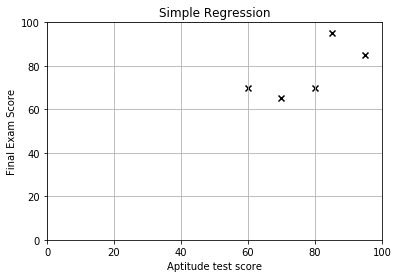

*** Iteration  2540000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





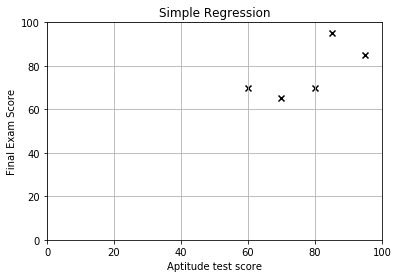

*** Iteration  2550000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





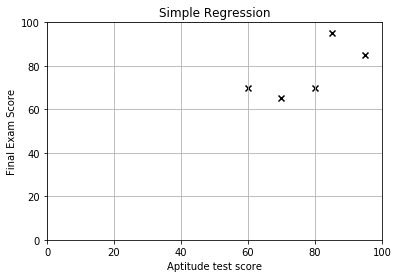

*** Iteration  2560000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





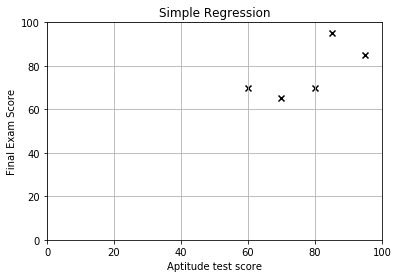

*** Iteration  2570000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





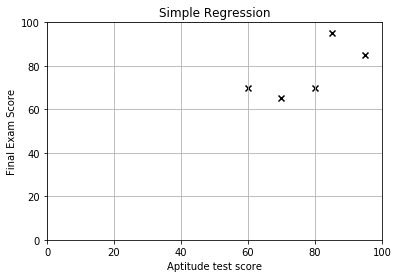

*** Iteration  2580000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





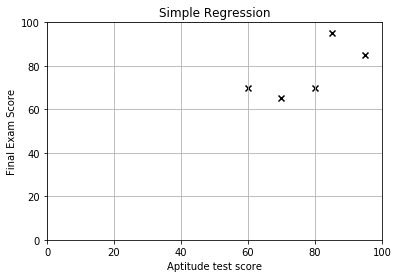

*** Iteration  2590000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





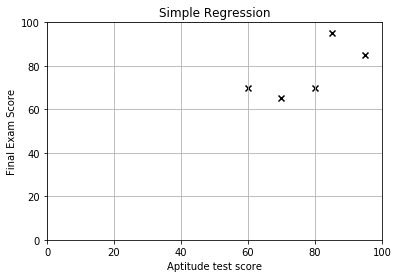

*** Iteration  2600000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





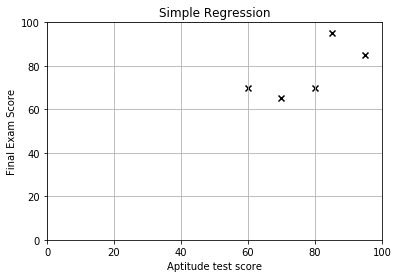

*** Iteration  2610000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





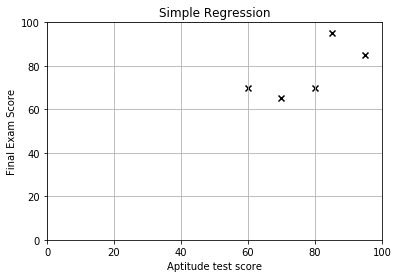

*** Iteration  2620000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





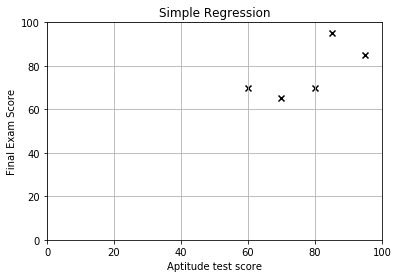

*** Iteration  2630000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





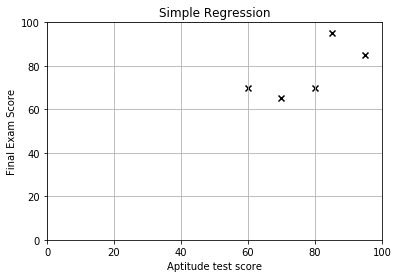

*** Iteration  2640000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





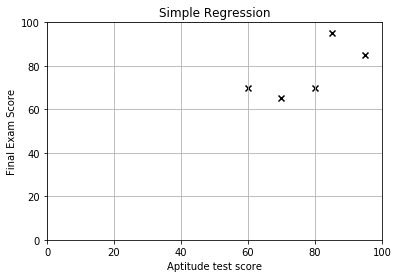

*** Iteration  2650000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





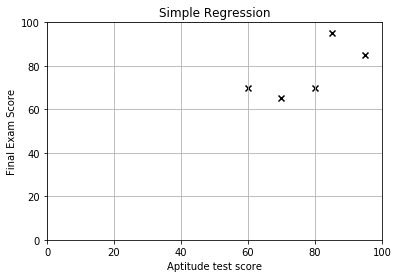

*** Iteration  2660000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





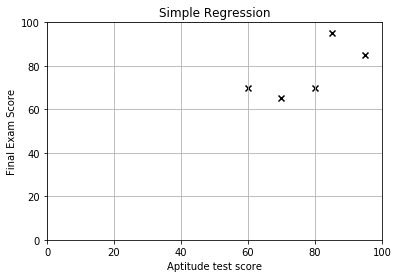

*** Iteration  2670000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





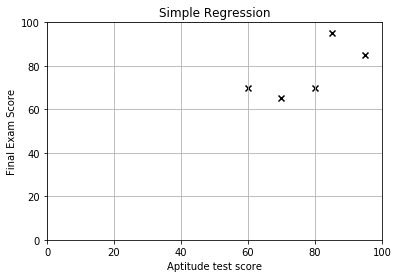

*** Iteration  2680000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





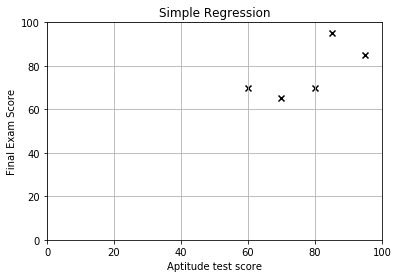

*** Iteration  2690000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





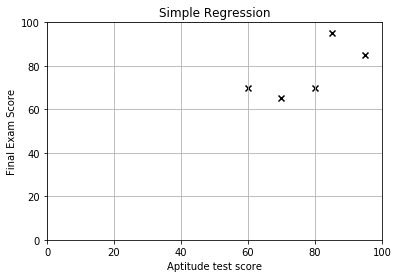

*** Iteration  2700000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





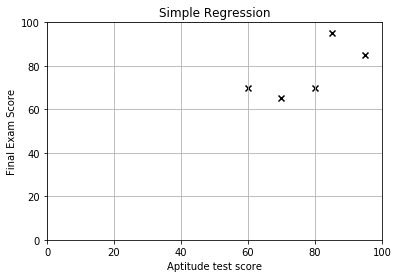

*** Iteration  2710000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





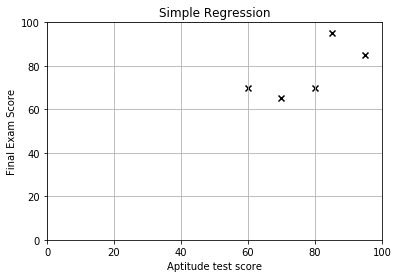

*** Iteration  2720000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





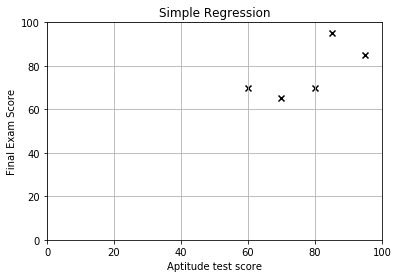

*** Iteration  2730000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





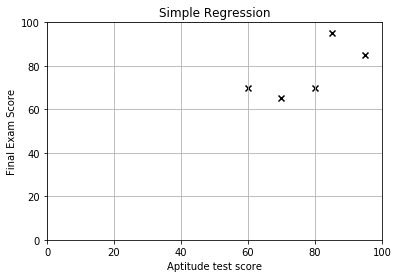

*** Iteration  2740000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





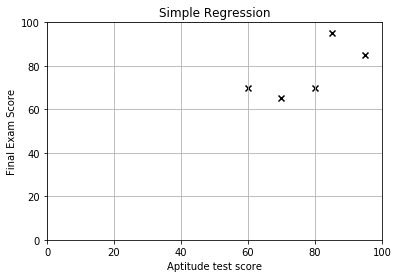

*** Iteration  2750000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





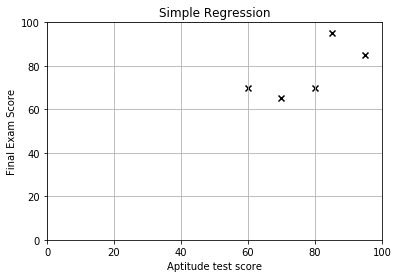

*** Iteration  2760000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





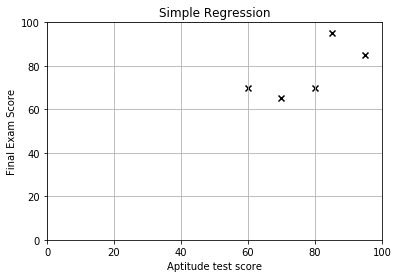

*** Iteration  2770000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





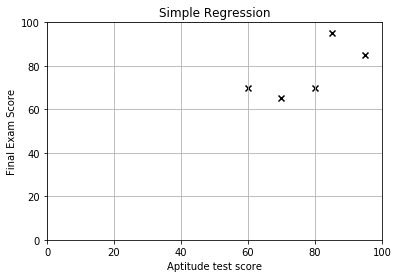

*** Iteration  2780000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





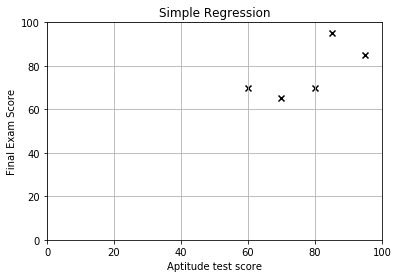

*** Iteration  2790000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





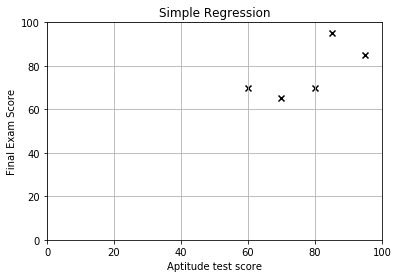

*** Iteration  2800000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





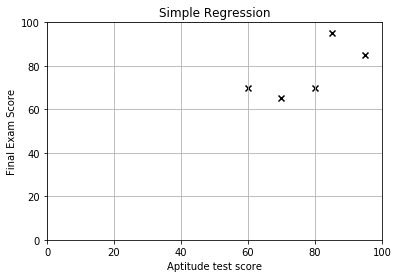

*** Iteration  2810000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





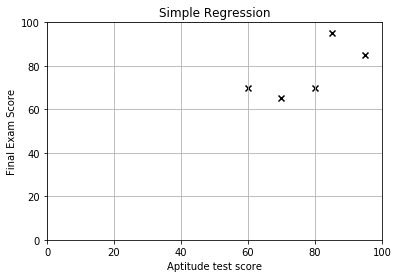

*** Iteration  2820000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





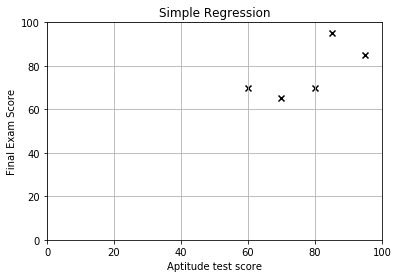

*** Iteration  2830000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





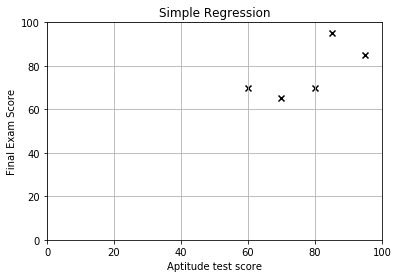

*** Iteration  2840000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





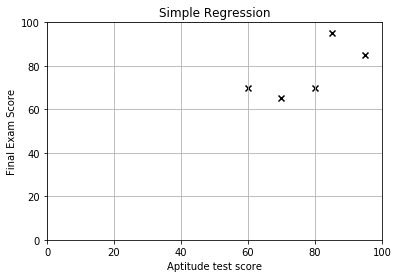

*** Iteration  2850000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





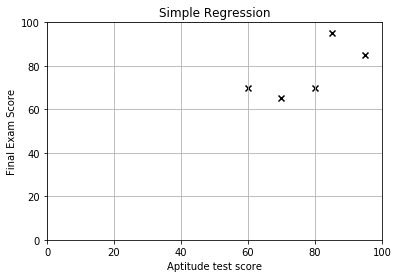

*** Iteration  2860000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





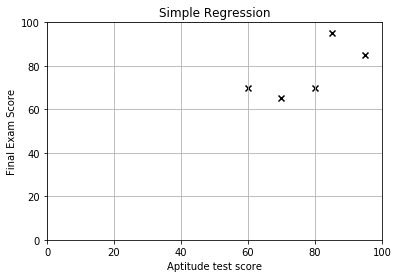

*** Iteration  2870000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





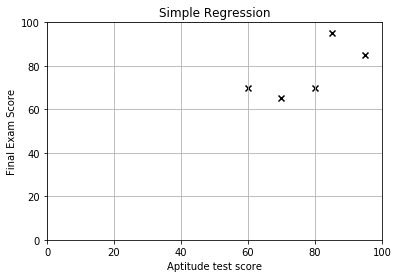

*** Iteration  2880000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





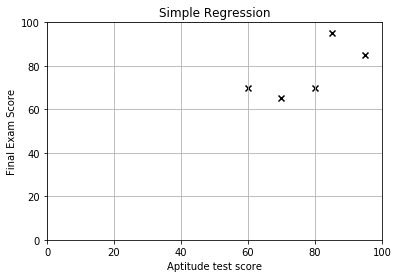

*** Iteration  2890000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





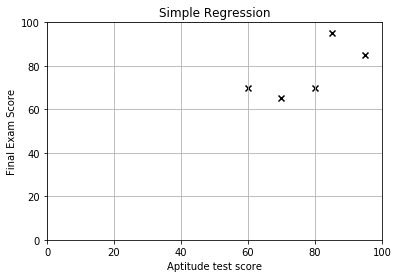

*** Iteration  2900000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





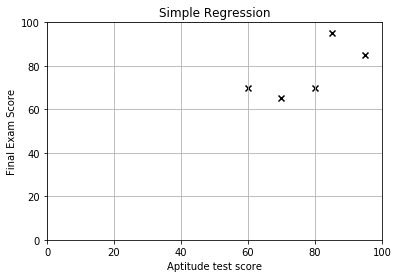

*** Iteration  2910000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





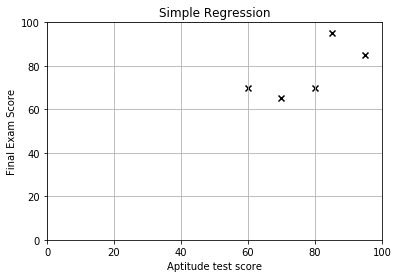

*** Iteration  2920000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





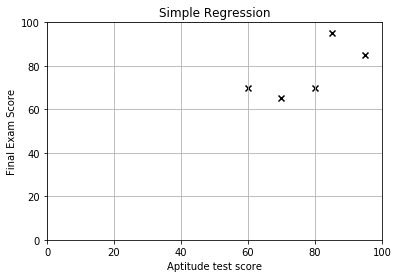

*** Iteration  2930000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





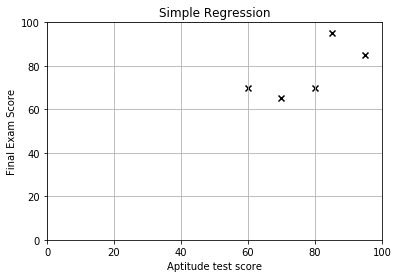

*** Iteration  2940000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





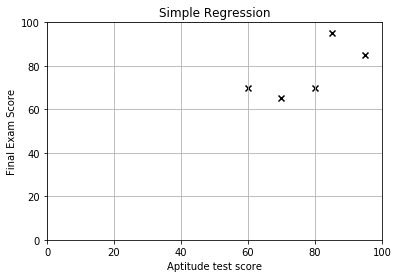

*** Iteration  2950000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





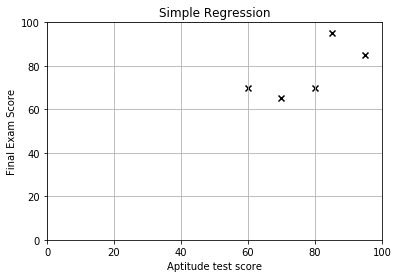

*** Iteration  2960000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





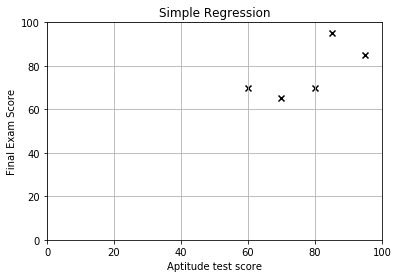

*** Iteration  2970000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





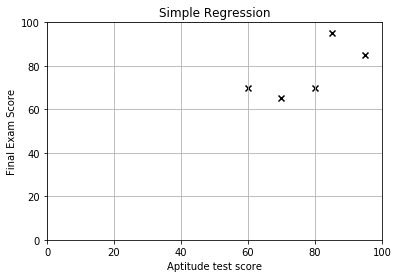

*** Iteration  2980000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





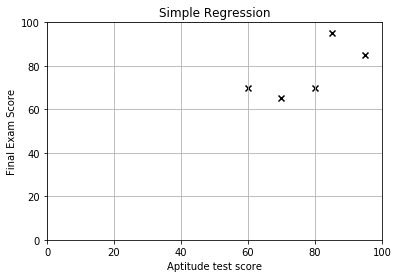

*** Iteration  2990000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





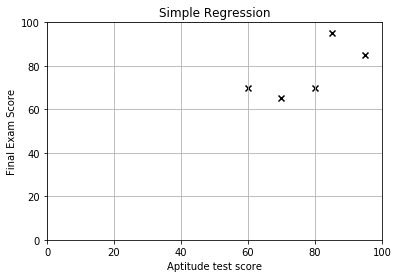

*** Iteration  3000000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





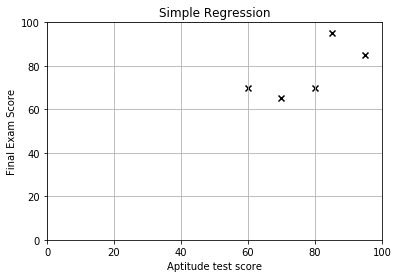

*** Iteration  3010000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





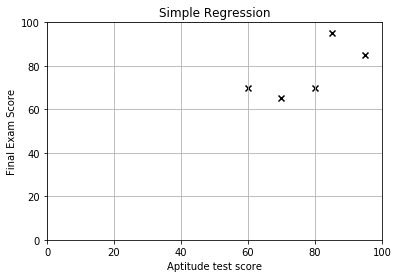

*** Iteration  3020000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





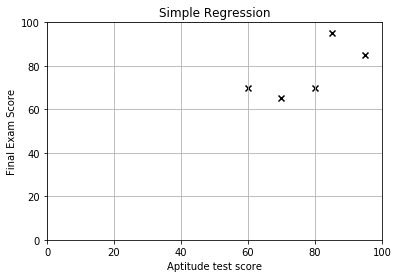

*** Iteration  3030000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





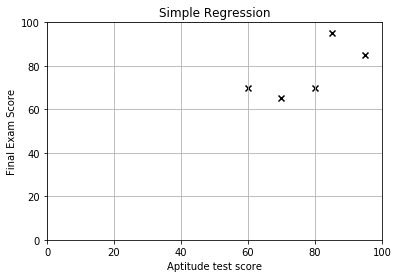

*** Iteration  3040000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





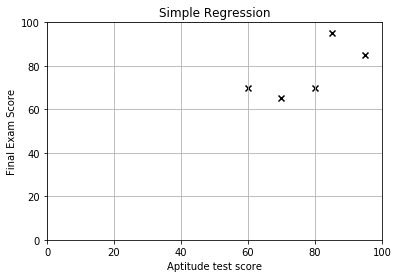

*** Iteration  3050000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





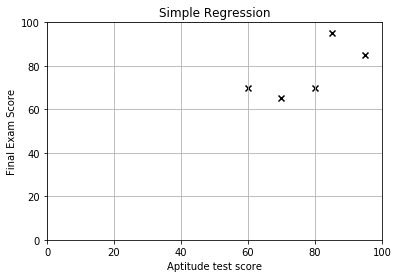

*** Iteration  3060000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





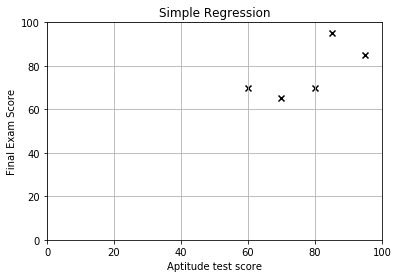

*** Iteration  3070000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





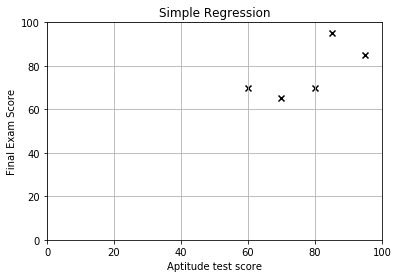

*** Iteration  3080000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





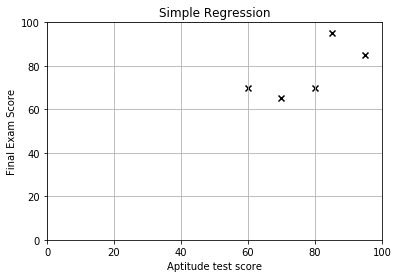

*** Iteration  3090000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





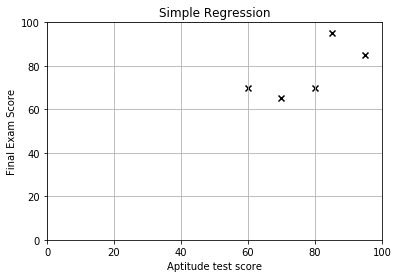

*** Iteration  3100000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





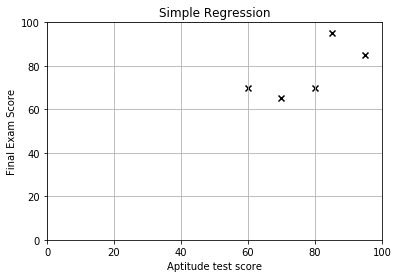

*** Iteration  3110000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





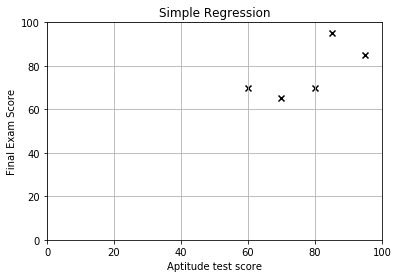

*** Iteration  3120000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





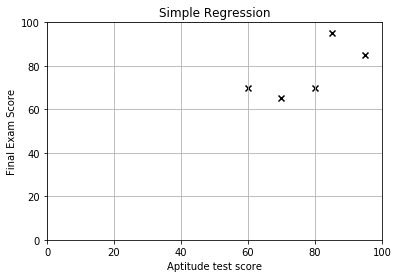

*** Iteration  3130000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





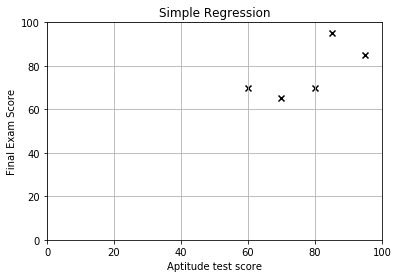

*** Iteration  3140000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





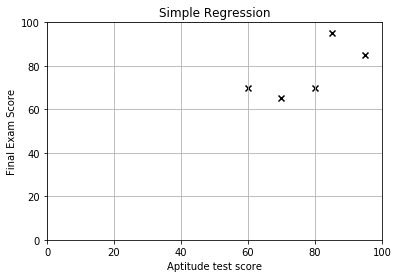

*** Iteration  3150000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





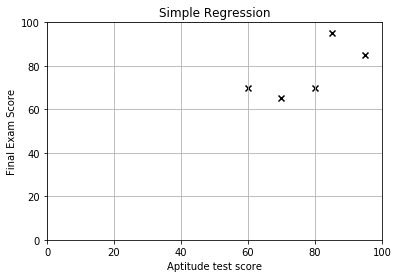

*** Iteration  3160000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





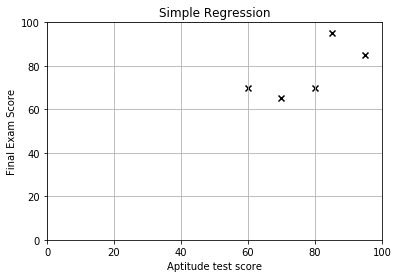

*** Iteration  3170000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





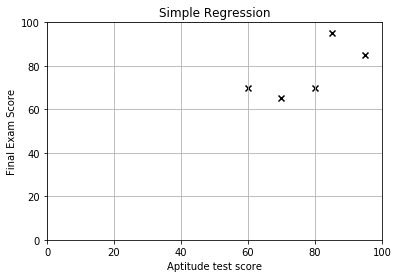

*** Iteration  3180000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





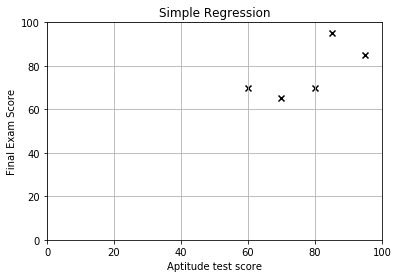

*** Iteration  3190000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





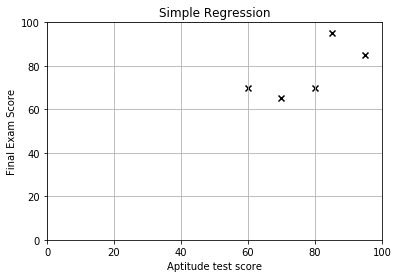

*** Iteration  3200000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





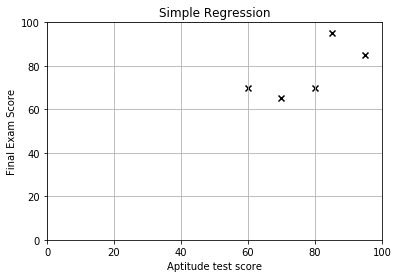

*** Iteration  3210000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





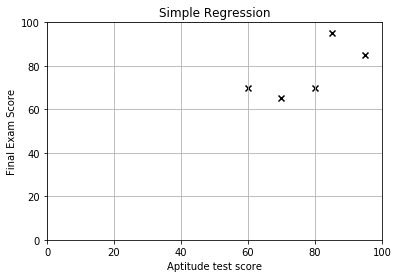

*** Iteration  3220000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





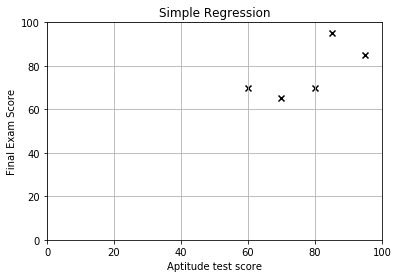

*** Iteration  3230000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





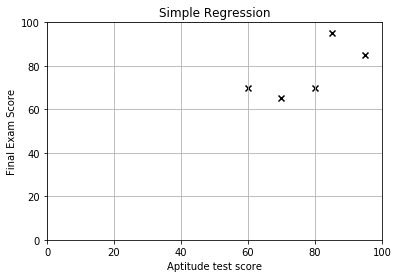

*** Iteration  3240000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





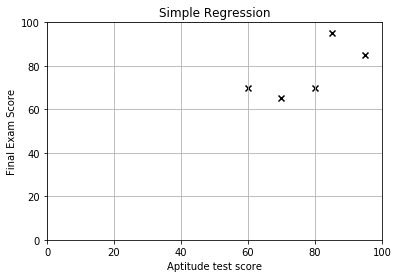

*** Iteration  3250000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





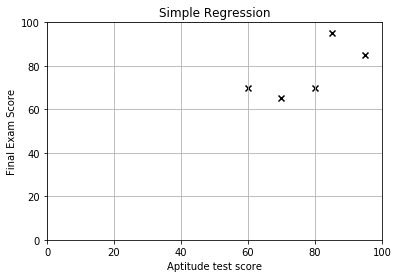

*** Iteration  3260000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





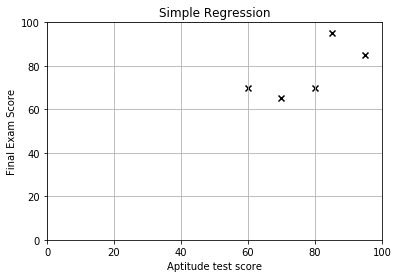

*** Iteration  3270000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





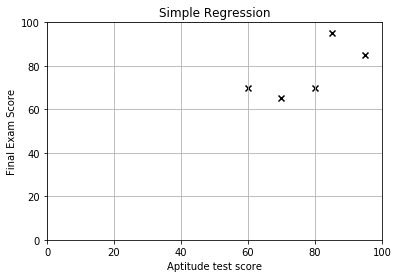

*** Iteration  3280000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





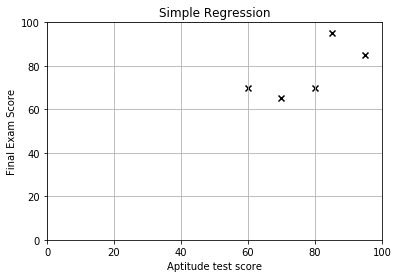

*** Iteration  3290000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





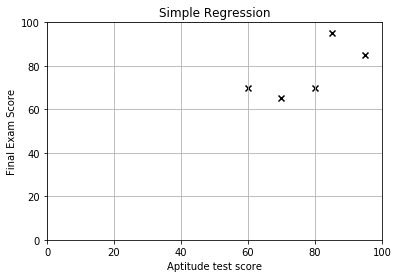

*** Iteration  3300000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





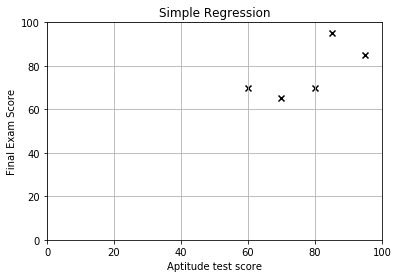

*** Iteration  3310000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





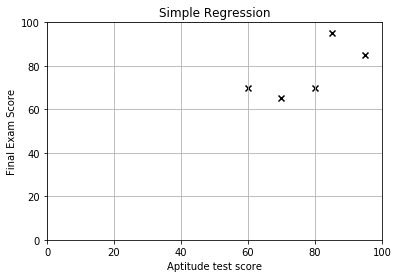

*** Iteration  3320000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





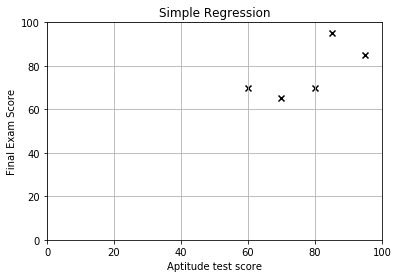

*** Iteration  3330000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





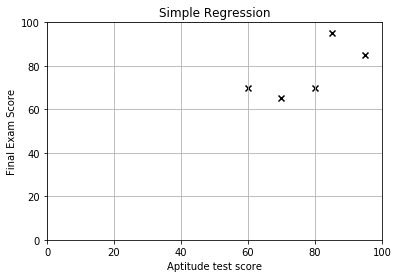

*** Iteration  3340000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





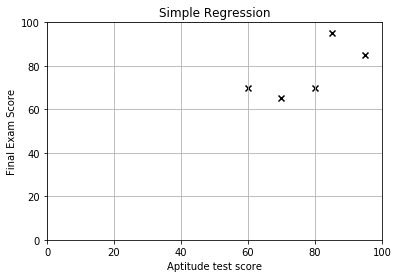

*** Iteration  3350000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





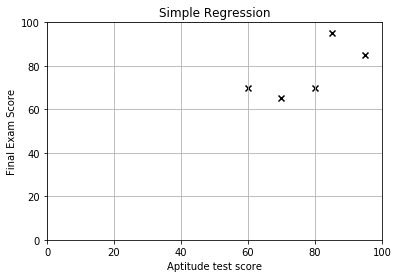

*** Iteration  3360000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





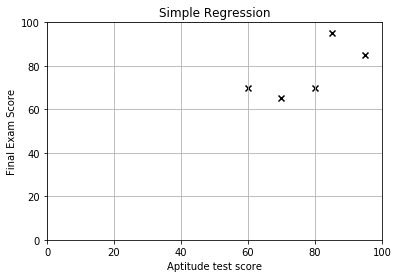

*** Iteration  3370000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





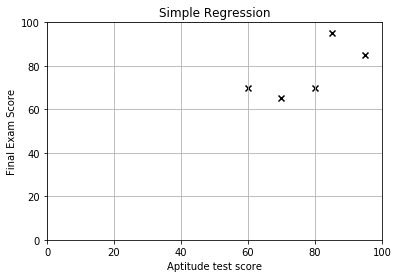

*** Iteration  3380000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





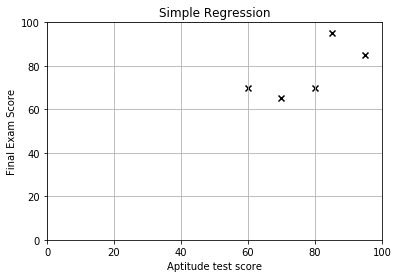

*** Iteration  3390000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





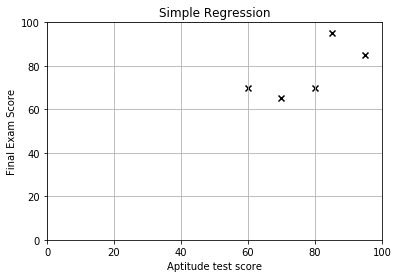

*** Iteration  3400000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





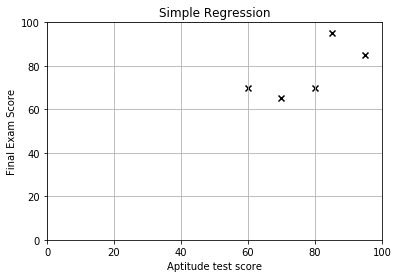

*** Iteration  3410000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





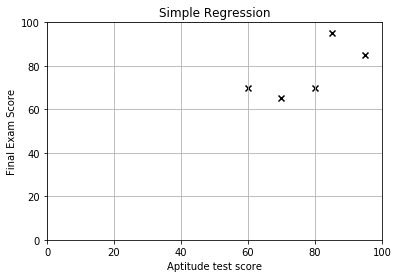

*** Iteration  3420000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





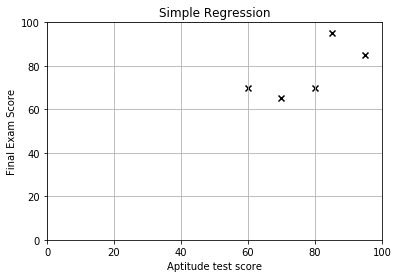

*** Iteration  3430000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





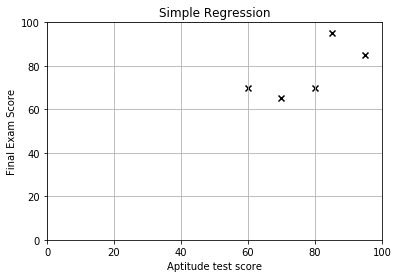

*** Iteration  3440000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





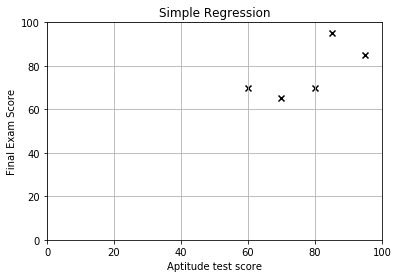

*** Iteration  3450000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





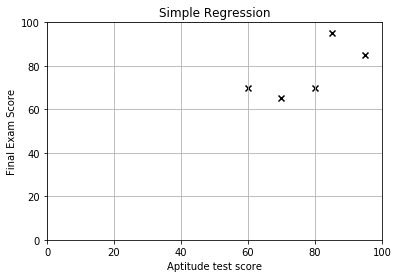

*** Iteration  3460000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





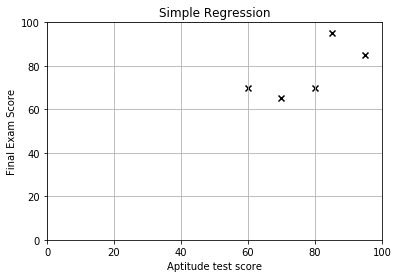

*** Iteration  3470000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





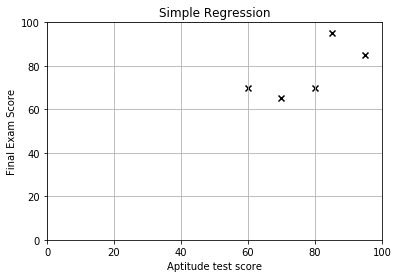

*** Iteration  3480000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





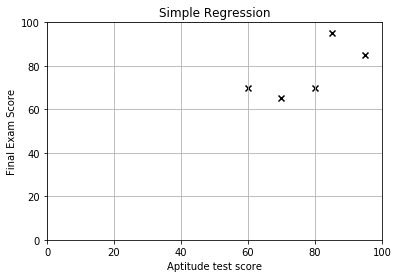

*** Iteration  3490000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





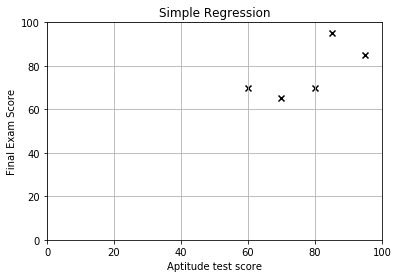

*** Iteration  3500000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





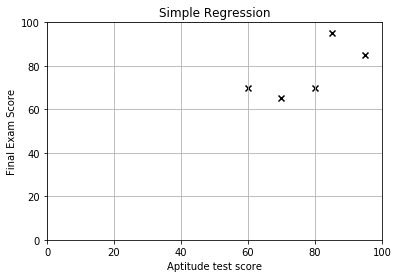

*** Iteration  3510000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





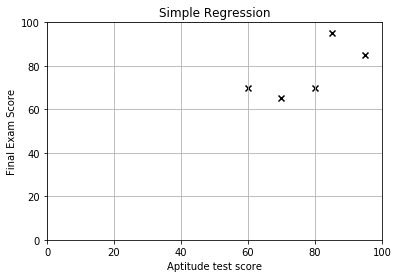

*** Iteration  3520000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





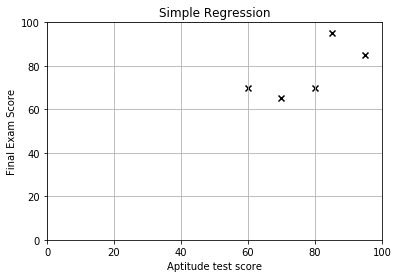

*** Iteration  3530000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





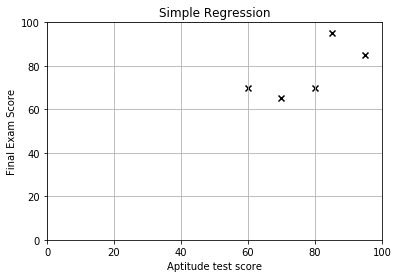

*** Iteration  3540000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





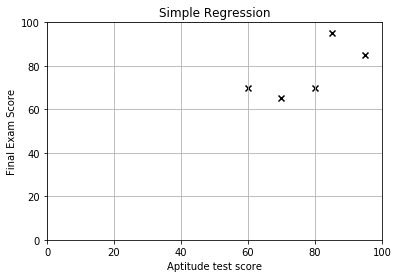

*** Iteration  3550000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





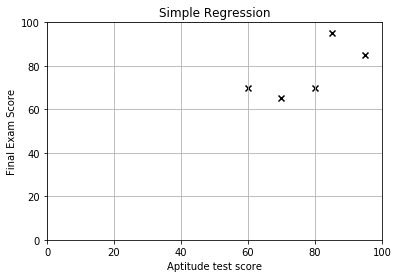

*** Iteration  3560000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





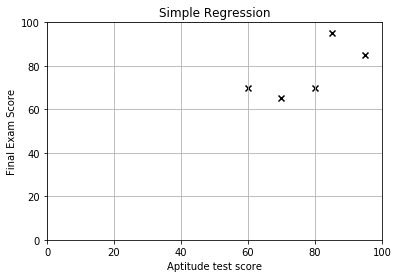

*** Iteration  3570000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





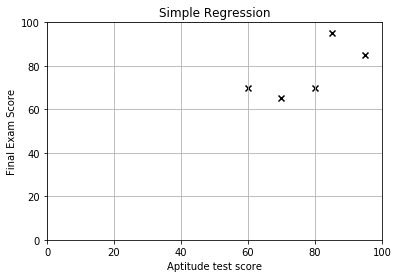

*** Iteration  3580000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





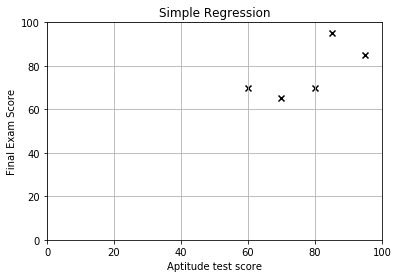

*** Iteration  3590000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





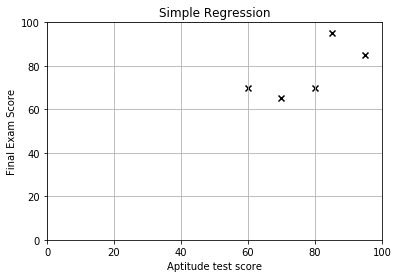

*** Iteration  3600000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





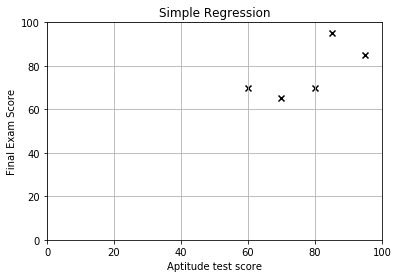

*** Iteration  3610000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





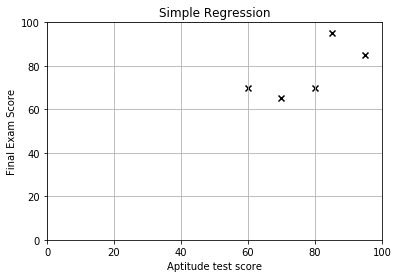

*** Iteration  3620000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





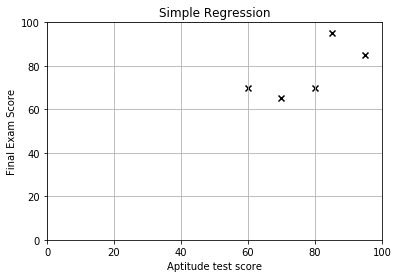

*** Iteration  3630000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





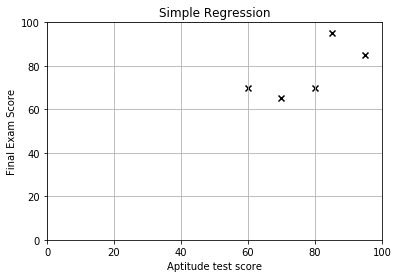

*** Iteration  3640000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





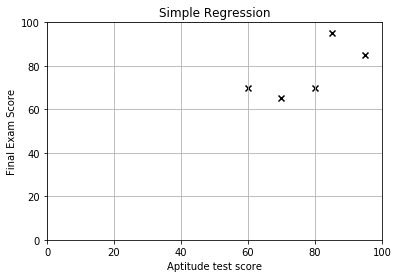

*** Iteration  3650000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





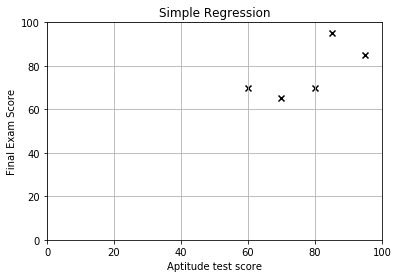

*** Iteration  3660000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





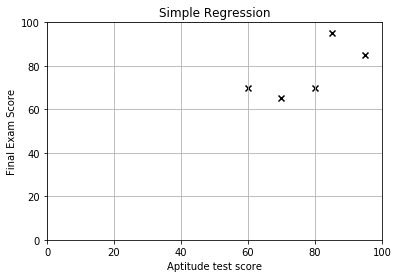

*** Iteration  3670000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





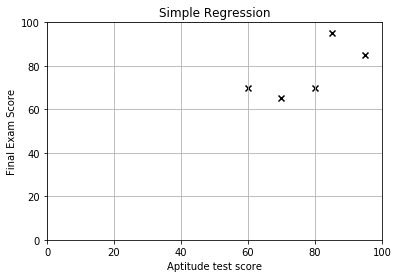

*** Iteration  3680000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





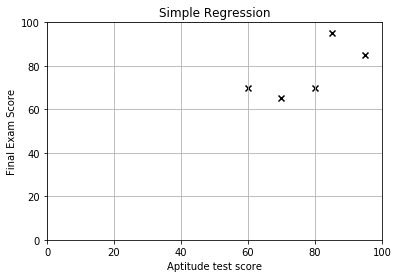

*** Iteration  3690000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





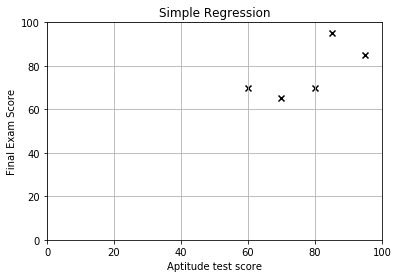

*** Iteration  3700000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





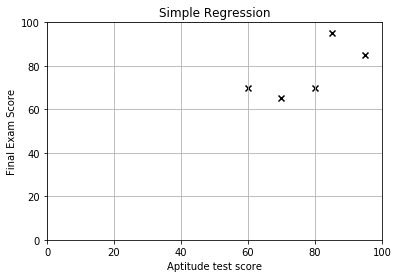

*** Iteration  3710000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





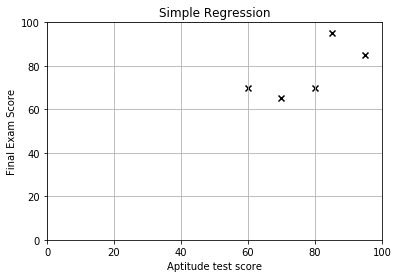

*** Iteration  3720000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





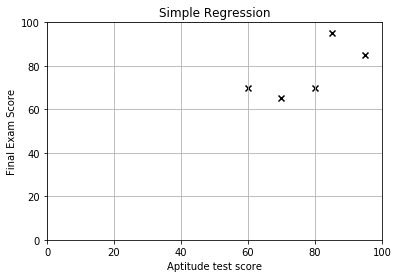

*** Iteration  3730000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





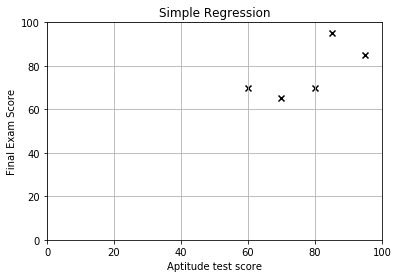

*** Iteration  3740000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





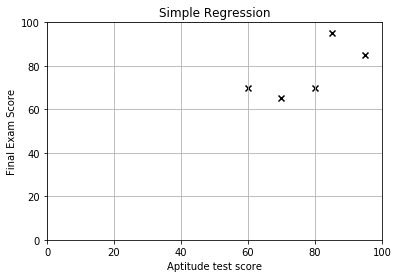

*** Iteration  3750000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





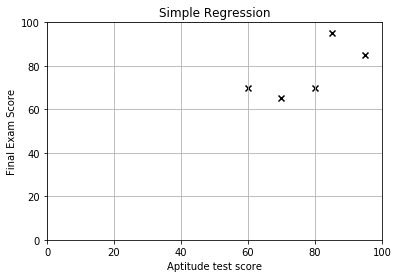

*** Iteration  3760000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





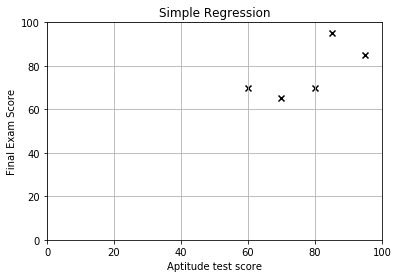

*** Iteration  3770000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





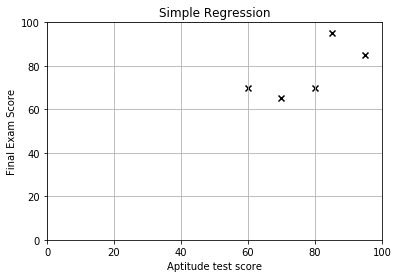

*** Iteration  3780000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





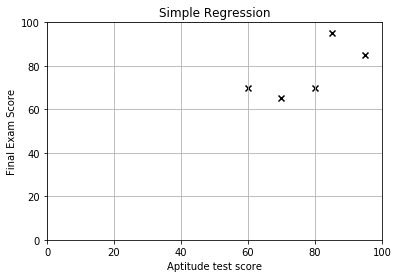

*** Iteration  3790000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





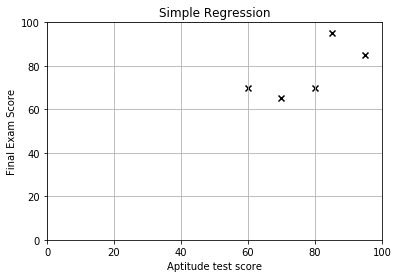

*** Iteration  3800000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





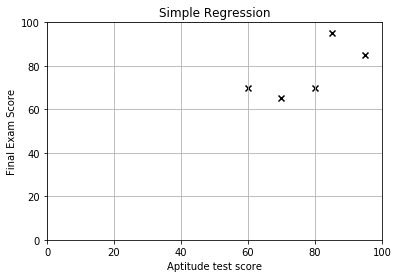

*** Iteration  3810000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





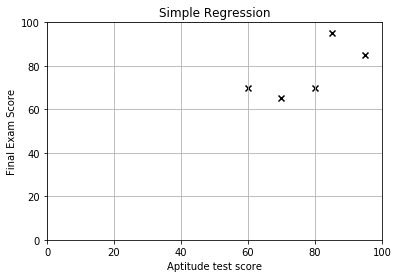

*** Iteration  3820000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





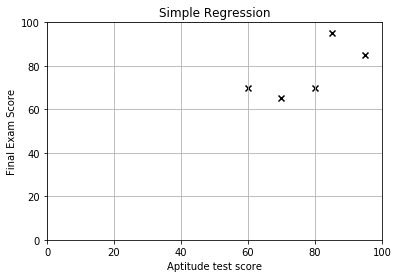

*** Iteration  3830000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





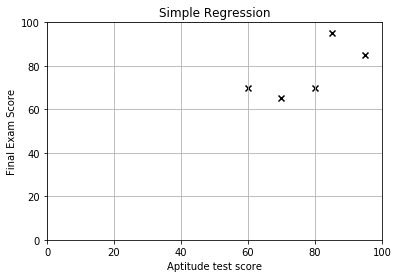

*** Iteration  3840000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





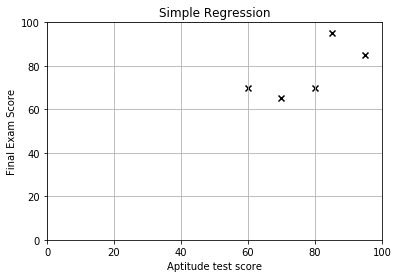

*** Iteration  3850000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





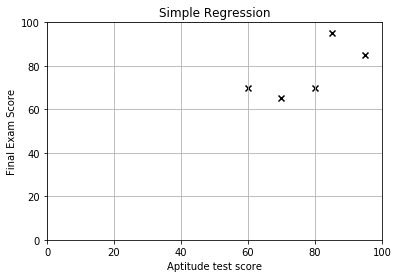

*** Iteration  3860000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





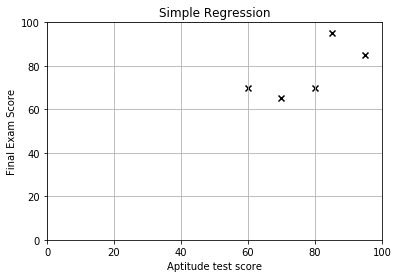

*** Iteration  3870000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





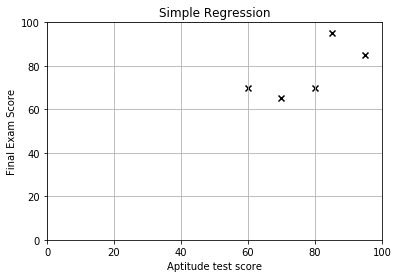

*** Iteration  3880000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





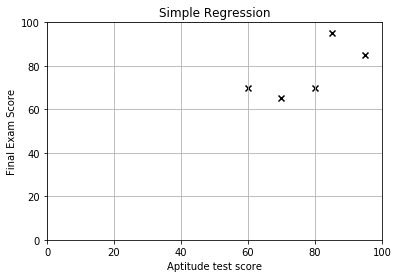

*** Iteration  3890000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





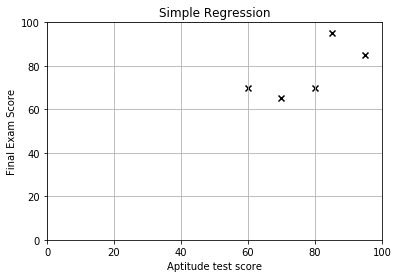

*** Iteration  3900000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





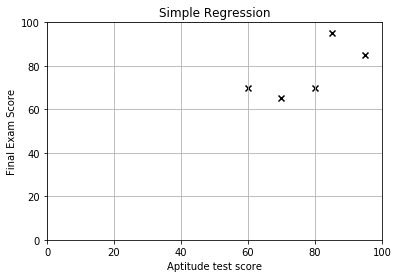

*** Iteration  3910000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





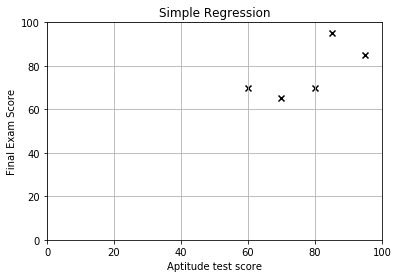

*** Iteration  3920000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





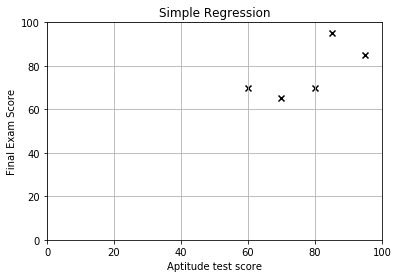

*** Iteration  3930000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





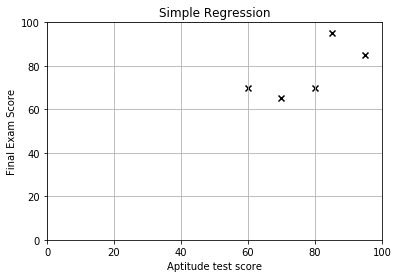

*** Iteration  3940000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





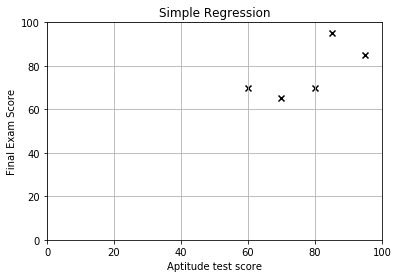

*** Iteration  3950000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





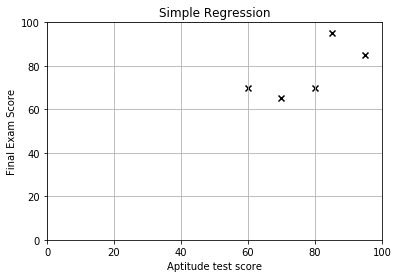

*** Iteration  3960000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





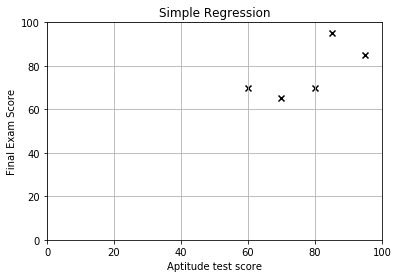

*** Iteration  3970000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





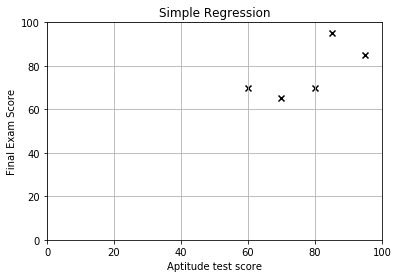

*** Iteration  3980000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





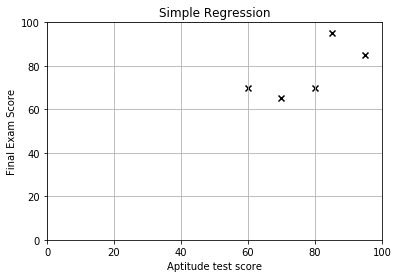

*** Iteration  3990000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





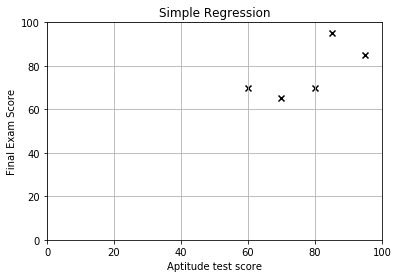

*** Iteration  4000000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





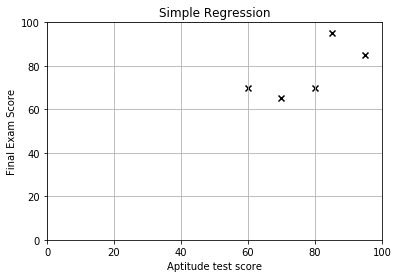

*** Iteration  4010000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





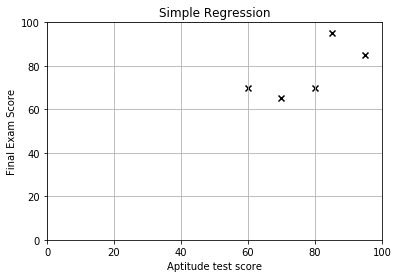

*** Iteration  4020000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





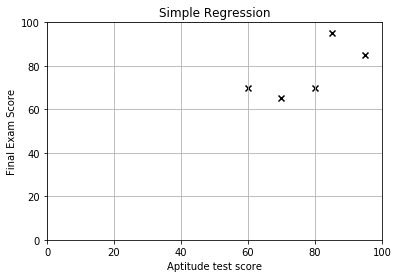

*** Iteration  4030000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





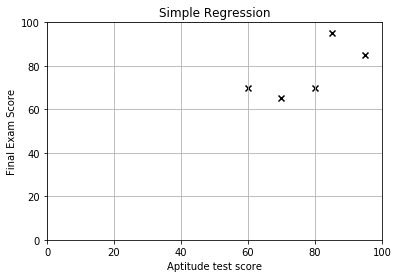

*** Iteration  4040000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





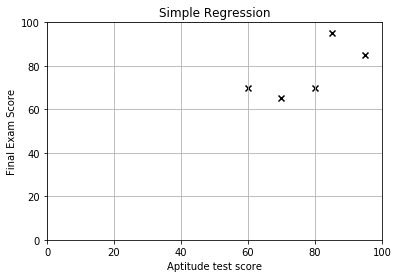

*** Iteration  4050000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





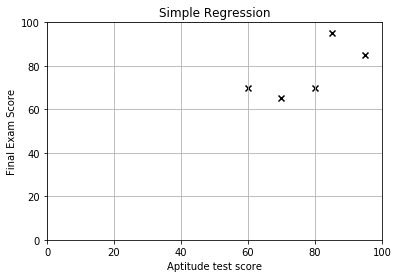

*** Iteration  4060000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





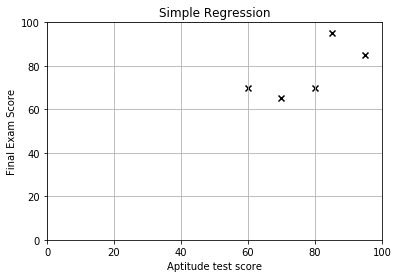

*** Iteration  4070000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





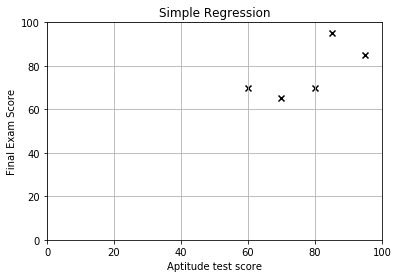

*** Iteration  4080000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





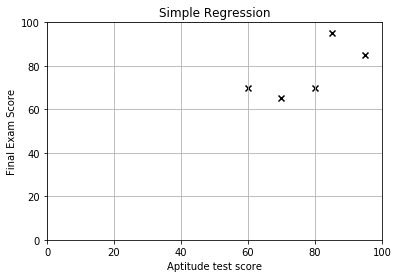

*** Iteration  4090000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





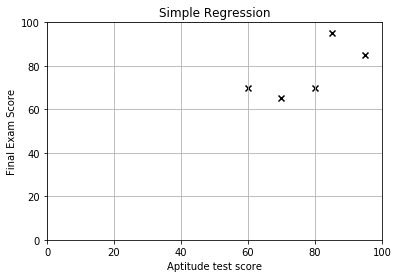

*** Iteration  4100000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





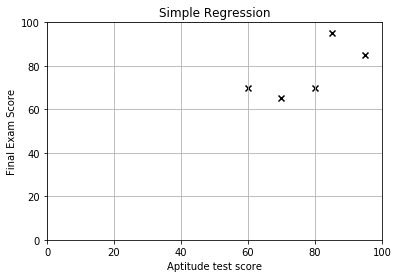

*** Iteration  4110000  improvement nan  updatedRss:  nan 
  B0:  nan  B1:  nan 





In [ ]:
#Iteratively find best betas using gradient descent

#caution:  this dataset has very few points, so local gradient estimation has very little
#           gradient to go on in some dimensions.  this will make it slow and
#           highly dependent on your starting beta.  Dont use this on real problems!
#-----------------------------------------------------------


#setup the search
epsilon = 0.000001  #amount of change to beta; used to find emperical gradients of the cost surface near current beta values
convergenceThreshold = 0.00001  #If beta changes less than this amount, finish the search
improvement = 99999999.0  #start with an unreasonbly high improvement

learning_rate = 10.0
iteration_count = 0
done = False


t = np.array([[1, 80]])


print("Starting beta search")

while not done:
    #capture current rss value
    iteration_count = iteration_count+1
    #print(iterations)
    yhatold = np.dot(X,beta)
    oldRss = np.dot((yhatold-y).T , (yhatold-y))
    
    #call the student-written code to find the gradient of the cost surface
    #at the current coefficient values (beta)
    [rss0Gradient,rss1Gradient] = compute_gradient(X,y,beta,epsilon)
    
    #compute the updates to the betas using the learning rate
    b0Update = (rss0Gradient*learning_rate)
    b1Update = (rss1Gradient*learning_rate)

    
    #compute the new betas
    b0new = np.asscalar(beta[0,0]+b0Update)
    b1new = np.asscalar(beta[1,0]+b1Update)

    #set the new betas
    beta.itemset((0,0),b0new)  
    beta.itemset((1,0),b1new)             
    
    #test for convergence    
    #if total change in beta is small then done
    done = np.sqrt(b0Update**2+b1Update**2)<convergenceThreshold
    
    
    #test for amount of improvement in RSS
    yhat = np.dot(X,beta)
    updatedRss = np.dot((yhat-y).T , (yhat-y))
    
    
    #the following code will print an update after a certain number of iterations
    displayEveryIterations=10000  #how many iterations to run before displaying an update
    if not np.mod(iteration_count,displayEveryIterations):   
        ythat = np.dot(t,beta)
        beta0 = beta[0,0]
        beta1 = beta[1,0]
        plot_regression_results(X, y, t, ythat, beta0,beta1)
        improvement = oldRss-updatedRss
        print('*** Iteration ',iteration_count,
              ' improvement',np.asscalar(improvement),  
              ' updatedRss: ',np.asscalar(updatedRss),
              '\n',
              ' B0: ', np.asscalar(beta0), ' B1: ', np.asscalar(beta1),
              '\n\n\n' )

       

print("Done")

print("Final Results")
plot_regression_results(X, y, t, ythat, beta0,beta1)


